Name-Vipul Anand
Batch-DS2312
Assignment-Project Hr Analytics

Importing the dataset and the necessary libraries

Problem Statement-
Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv(r"C:\Users\vipul\OneDrive\Documents\datatrained\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [14]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [439]:
data.shape

(1470, 35)

In [440]:
#there are 1470 columns in the dataset and 35 rows are there
#Checking the unique values in each column after we will drop the unnecessary
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Now based on our various observation we will drop some columns because they do not give much value to our dataset and label
1.Employee_count-it has only 1 value count and is same for all the rows so no meaning of keeping it

2.Employee_number-it is different for all the rows and has different values for all employee and we do not keep
these types of columns for analysis or for model building. I data science these types of columns have no use

3.Over18- The indian law prohibts anyone under 18 to work anywhere that is why i think all the employees are above 18 and if all
the employees are above18 and this columns is same in all row than again no point of keeping it.

4.Standardhours-It is same 80 hours for all the employees

In [441]:
columns_to_remove=['EmployeeNumber','EmployeeCount','Over18','StandardHours']
data=data.drop(columns=columns_to_remove)

In [442]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


Now we can proceed to the EDA part

In [443]:
#Columns in the dataset
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [444]:
#The nulls 
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

The Dataframe has no nulls

In [445]:
#Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

Now let us divide our dataset into object columns and int columns as our dataset has both types of columns

In [446]:
object_columns=[]
integer_columns=[]
for i in data.columns:
    if data[i].dtype=='object':
        object_columns.append(i)
    else:
        integer_columns.append(i)

In [447]:
#Let us check whether the object_columns and the integer_columns have covered all the columns in the dataset or not
if len(object_columns)+len(integer_columns)==len(data.columns):
    print('Yes they have all the columns')
else:
    print('You need to check if the dataset has other columns also or not')

Yes they have all the columns


In [448]:
object_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [449]:
integer_columns

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Now come to the visualization part

In [450]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


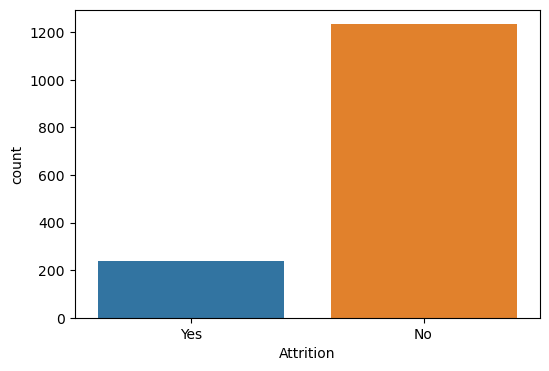

In [451]:
#Attrition
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition',data=data)
plt.show()

The attrition column which is our label seems to be undersampled in yes
We will take care of it later on right now our focus is on visualization

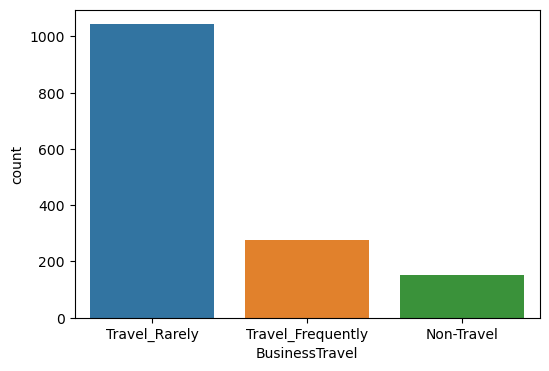

In [341]:
#Bussiness travel
plt.figure(figsize=(6,4))
sns.countplot(x='BusinessTravel',data=data)
plt.show()

All types of employees are present in this column who travel rarely, who travel frequently and there are also employees who
are not able to travle anytime. It maybe because of their worklife balance is very hard or their salary is low 
let us look into this

In [342]:
data.groupby(['BusinessTravel'])['MonthlyIncome'].mean()

BusinessTravel
Non-Travel           6261.946667
Travel_Frequently    6193.725632
Travel_Rarely        6619.707574
Name: MonthlyIncome, dtype: float64

In [18]:
#So there is not much difference in the salary of the employee on travel

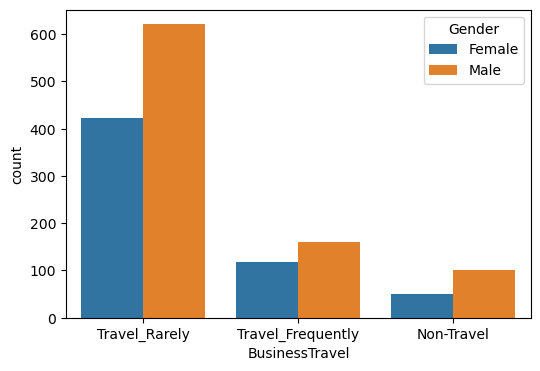

In [343]:
#Traveling comparision of male and female
plt.figure(figsize=(6,4))
sns.countplot(x='BusinessTravel',hue='Gender',data=data)
plt.show()

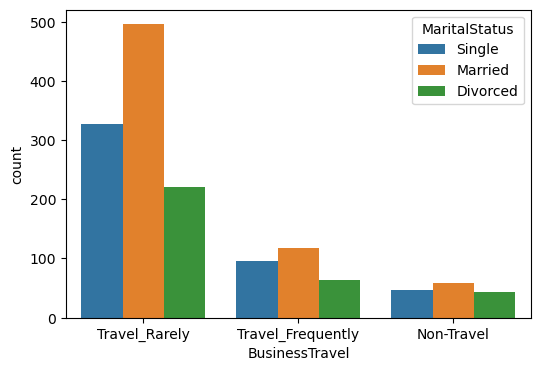

In [344]:
#So mens travel more
#Now let us do this for other marriage vs travel
plt.figure(figsize=(6,4))
sns.countplot(x='BusinessTravel',hue='MaritalStatus',data=data)
plt.show()

In [57]:
#So it is clear that married employee travel more often

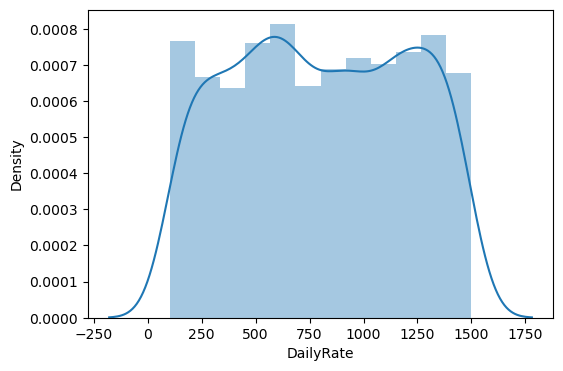

In [345]:
#Dailyrate
plt.figure(figsize=(6,4))
sns.distplot(data['DailyRate'])
plt.show()

The curve seems to be normally distributed

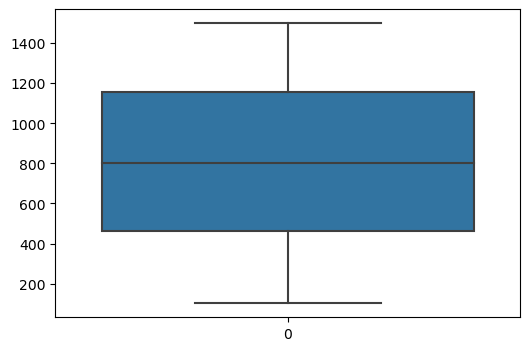

In [346]:
#boxplot
plt.figure(figsize=(6,4))
sns.boxplot(data['DailyRate'])
plt.show()
#No outliers at all

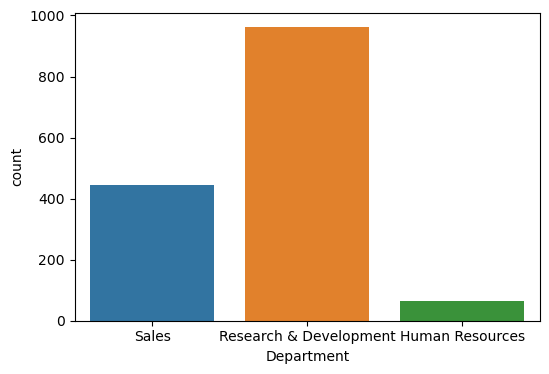

In [347]:
#Departments
plt.figure(figsize=(6,4))
sns.countplot(x='Department',data=data)
plt.show()

In [72]:
#So there are more people in research&development

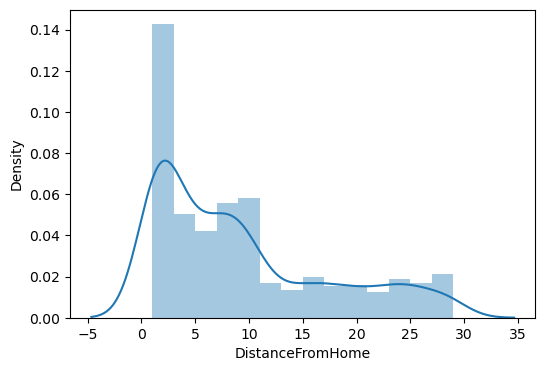

In [348]:
#DistanceFromHome
plt.figure(figsize=(6,4))
sns.distplot(data['DistanceFromHome'])
plt.show()

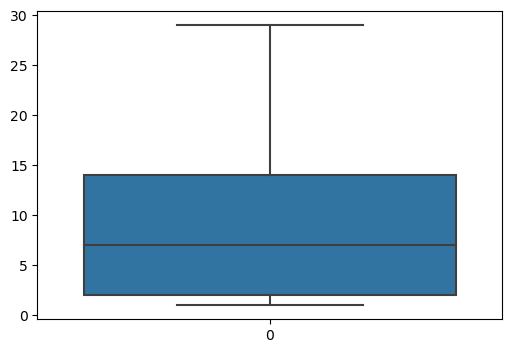

In [349]:
plt.figure(figsize=(6,4))
sns.boxplot(data['DistanceFromHome'])
plt.show()

In [80]:
#No need of outlier detection

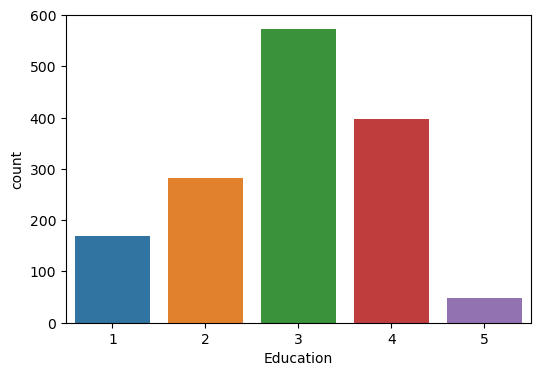

In [350]:
#Education
plt.figure(figsize=(6,4))
sns.countplot(x='Education',data=data)
plt.show()

In [86]:
#The data is distribution and is already encoded i think that is why numerical values are there

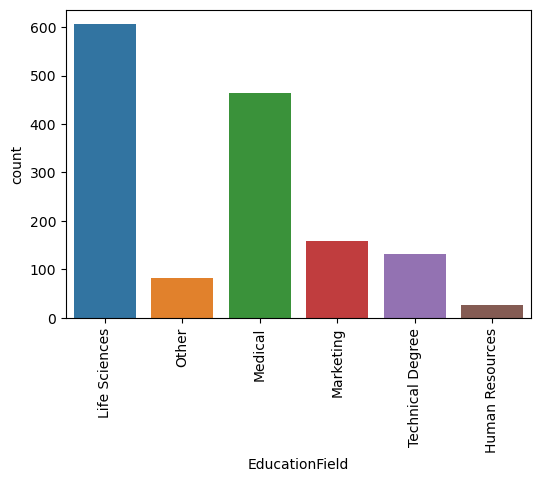

In [351]:
#EducationField
plt.figure(figsize=(6,4))
sns.countplot(x='EducationField',data=data)
plt.xticks(rotation=90)
plt.show()

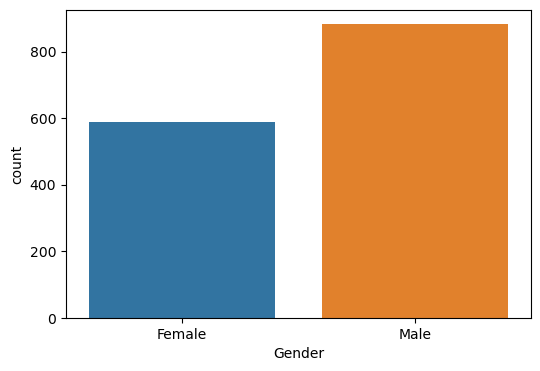

In [352]:
#Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender',data=data)
plt.show()

As the number of columns are way too high so now we will visualize the important columns only

In [353]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


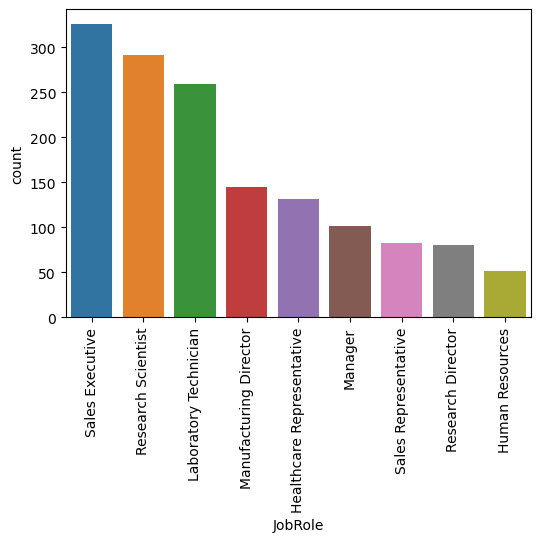

In [354]:
#JobROle
#Gender
plt.figure(figsize=(6,4))
sns.countplot(x='JobRole',data=data)
plt.xticks(rotation=90)
plt.show()

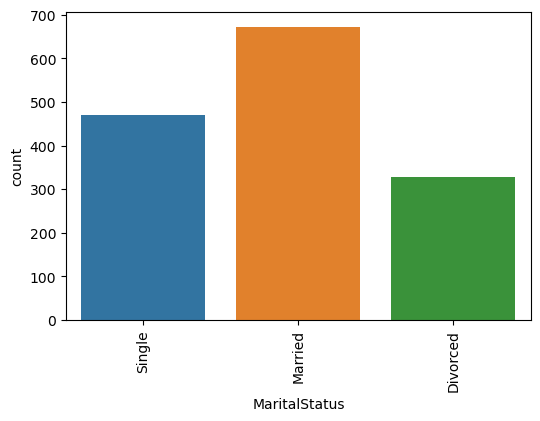

In [355]:
#Marital Status
plt.figure(figsize=(6,4))
sns.countplot(x='MaritalStatus',data=data)
plt.xticks(rotation=90)
plt.show()

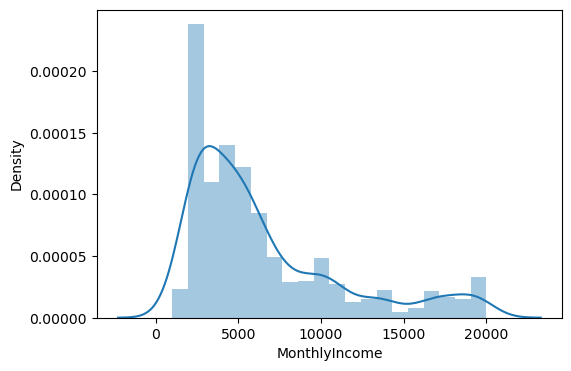

In [452]:
#Monthly income
plt.figure(figsize=(6,4))
sns.distplot(data['MonthlyIncome'])
plt.show()

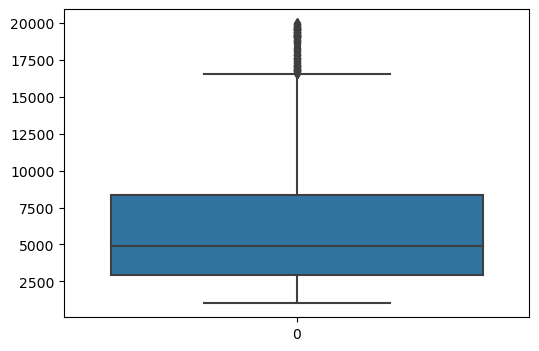

In [453]:
#Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(data['MonthlyIncome'])
plt.show()

Outliers are definately there we will remove it later on

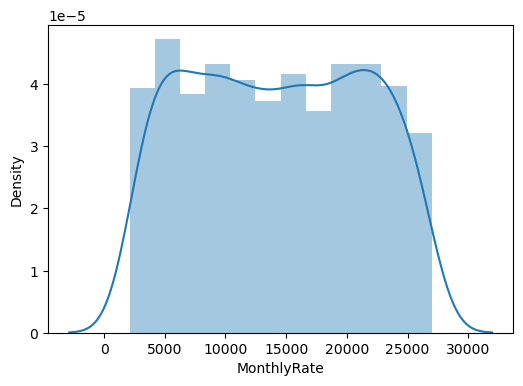

In [454]:
#Monthly rate
plt.figure(figsize=(6,4))
sns.distplot(data['MonthlyRate'])
plt.show()

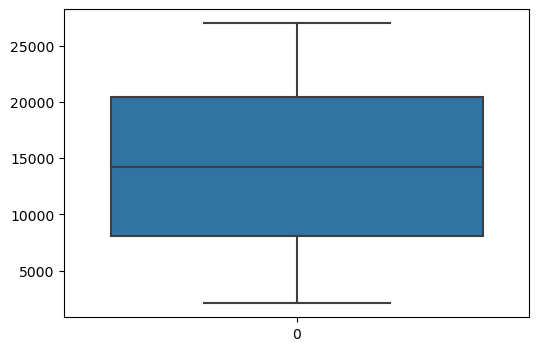

In [455]:
#Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(data['MonthlyRate'])
plt.show()

No outliers in monthlrate

In [456]:
#Let us visualize the total numerical columns
len(integer_columns)

23

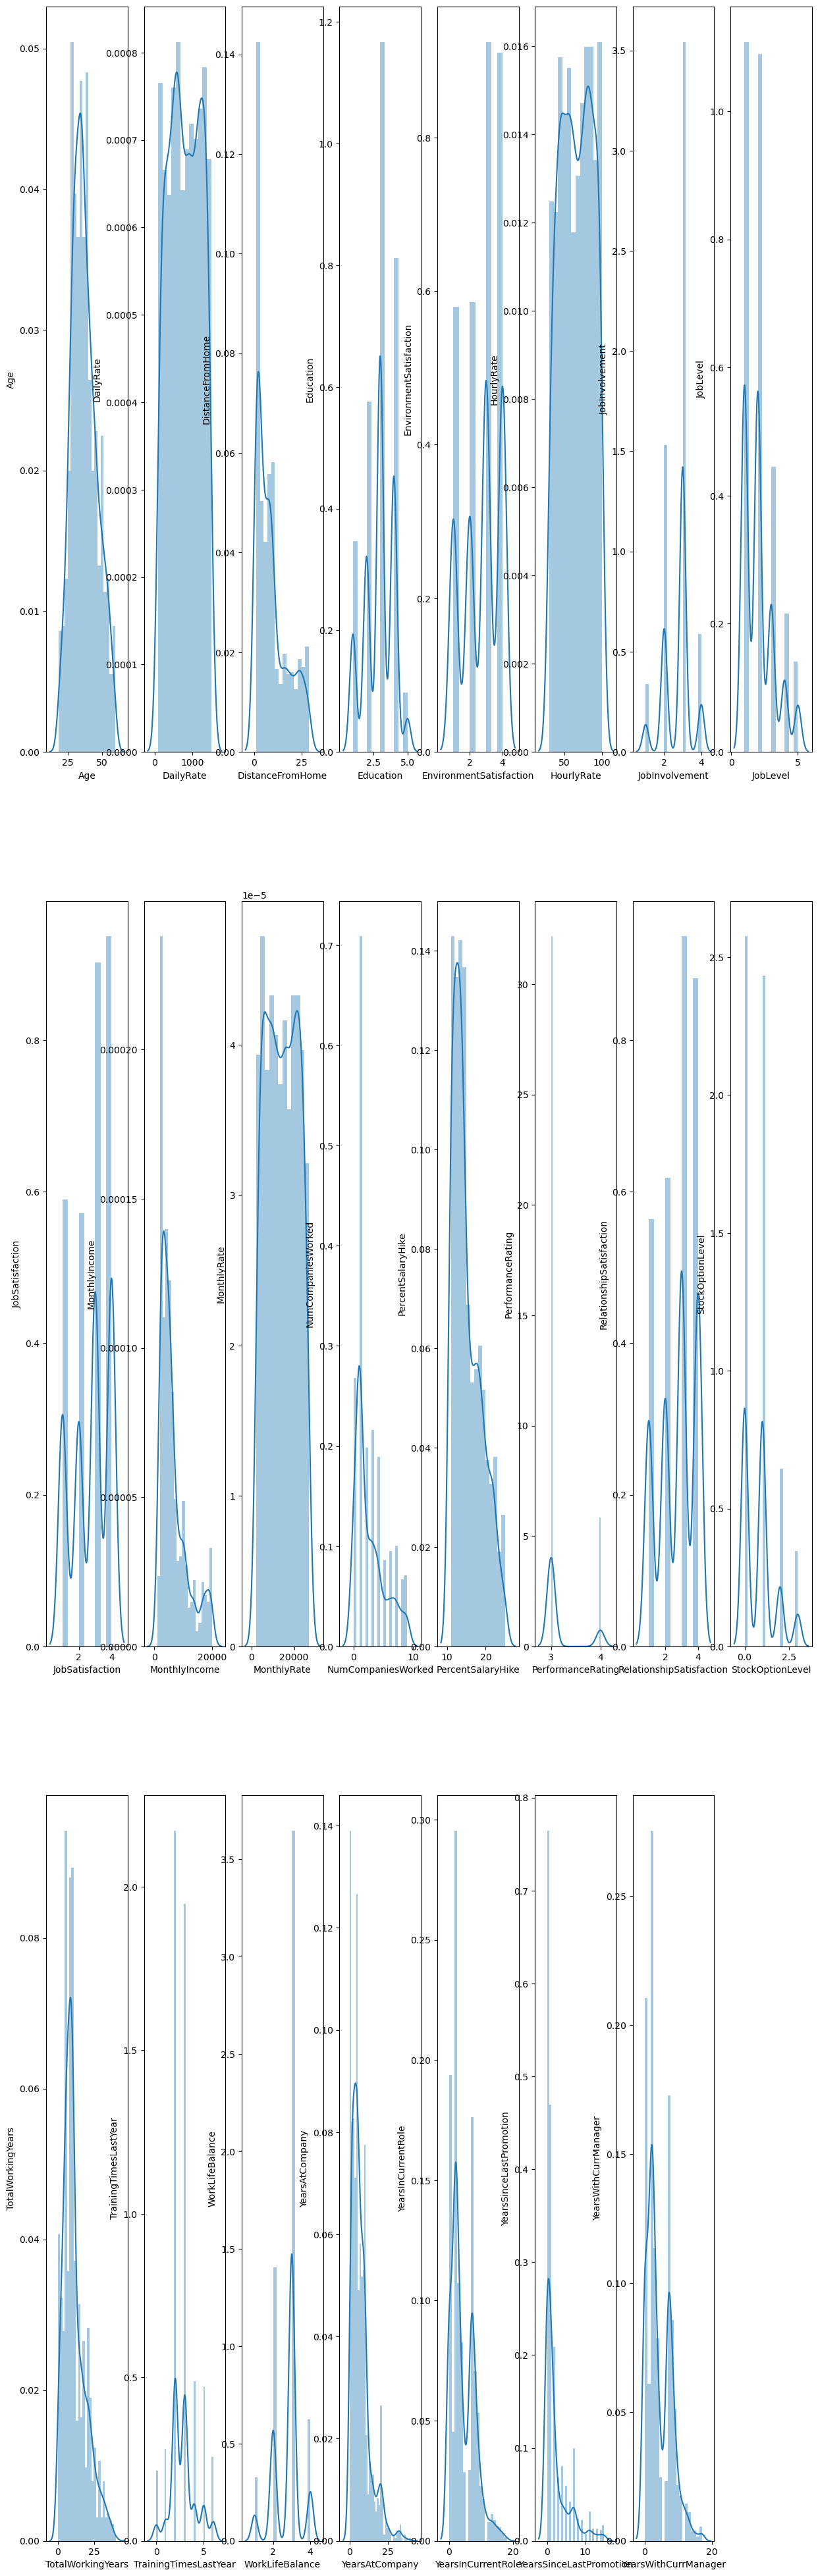

In [361]:
plt.figure(figsize=(15,50))
plotnumber=1
for i in  integer_columns:
    plt.subplot(3,8,plotnumber)
    sns.distplot(data[i])
    plt.ylabel(i)
    plt.xlabel(i)
    plotnumber+=1
plt.show()

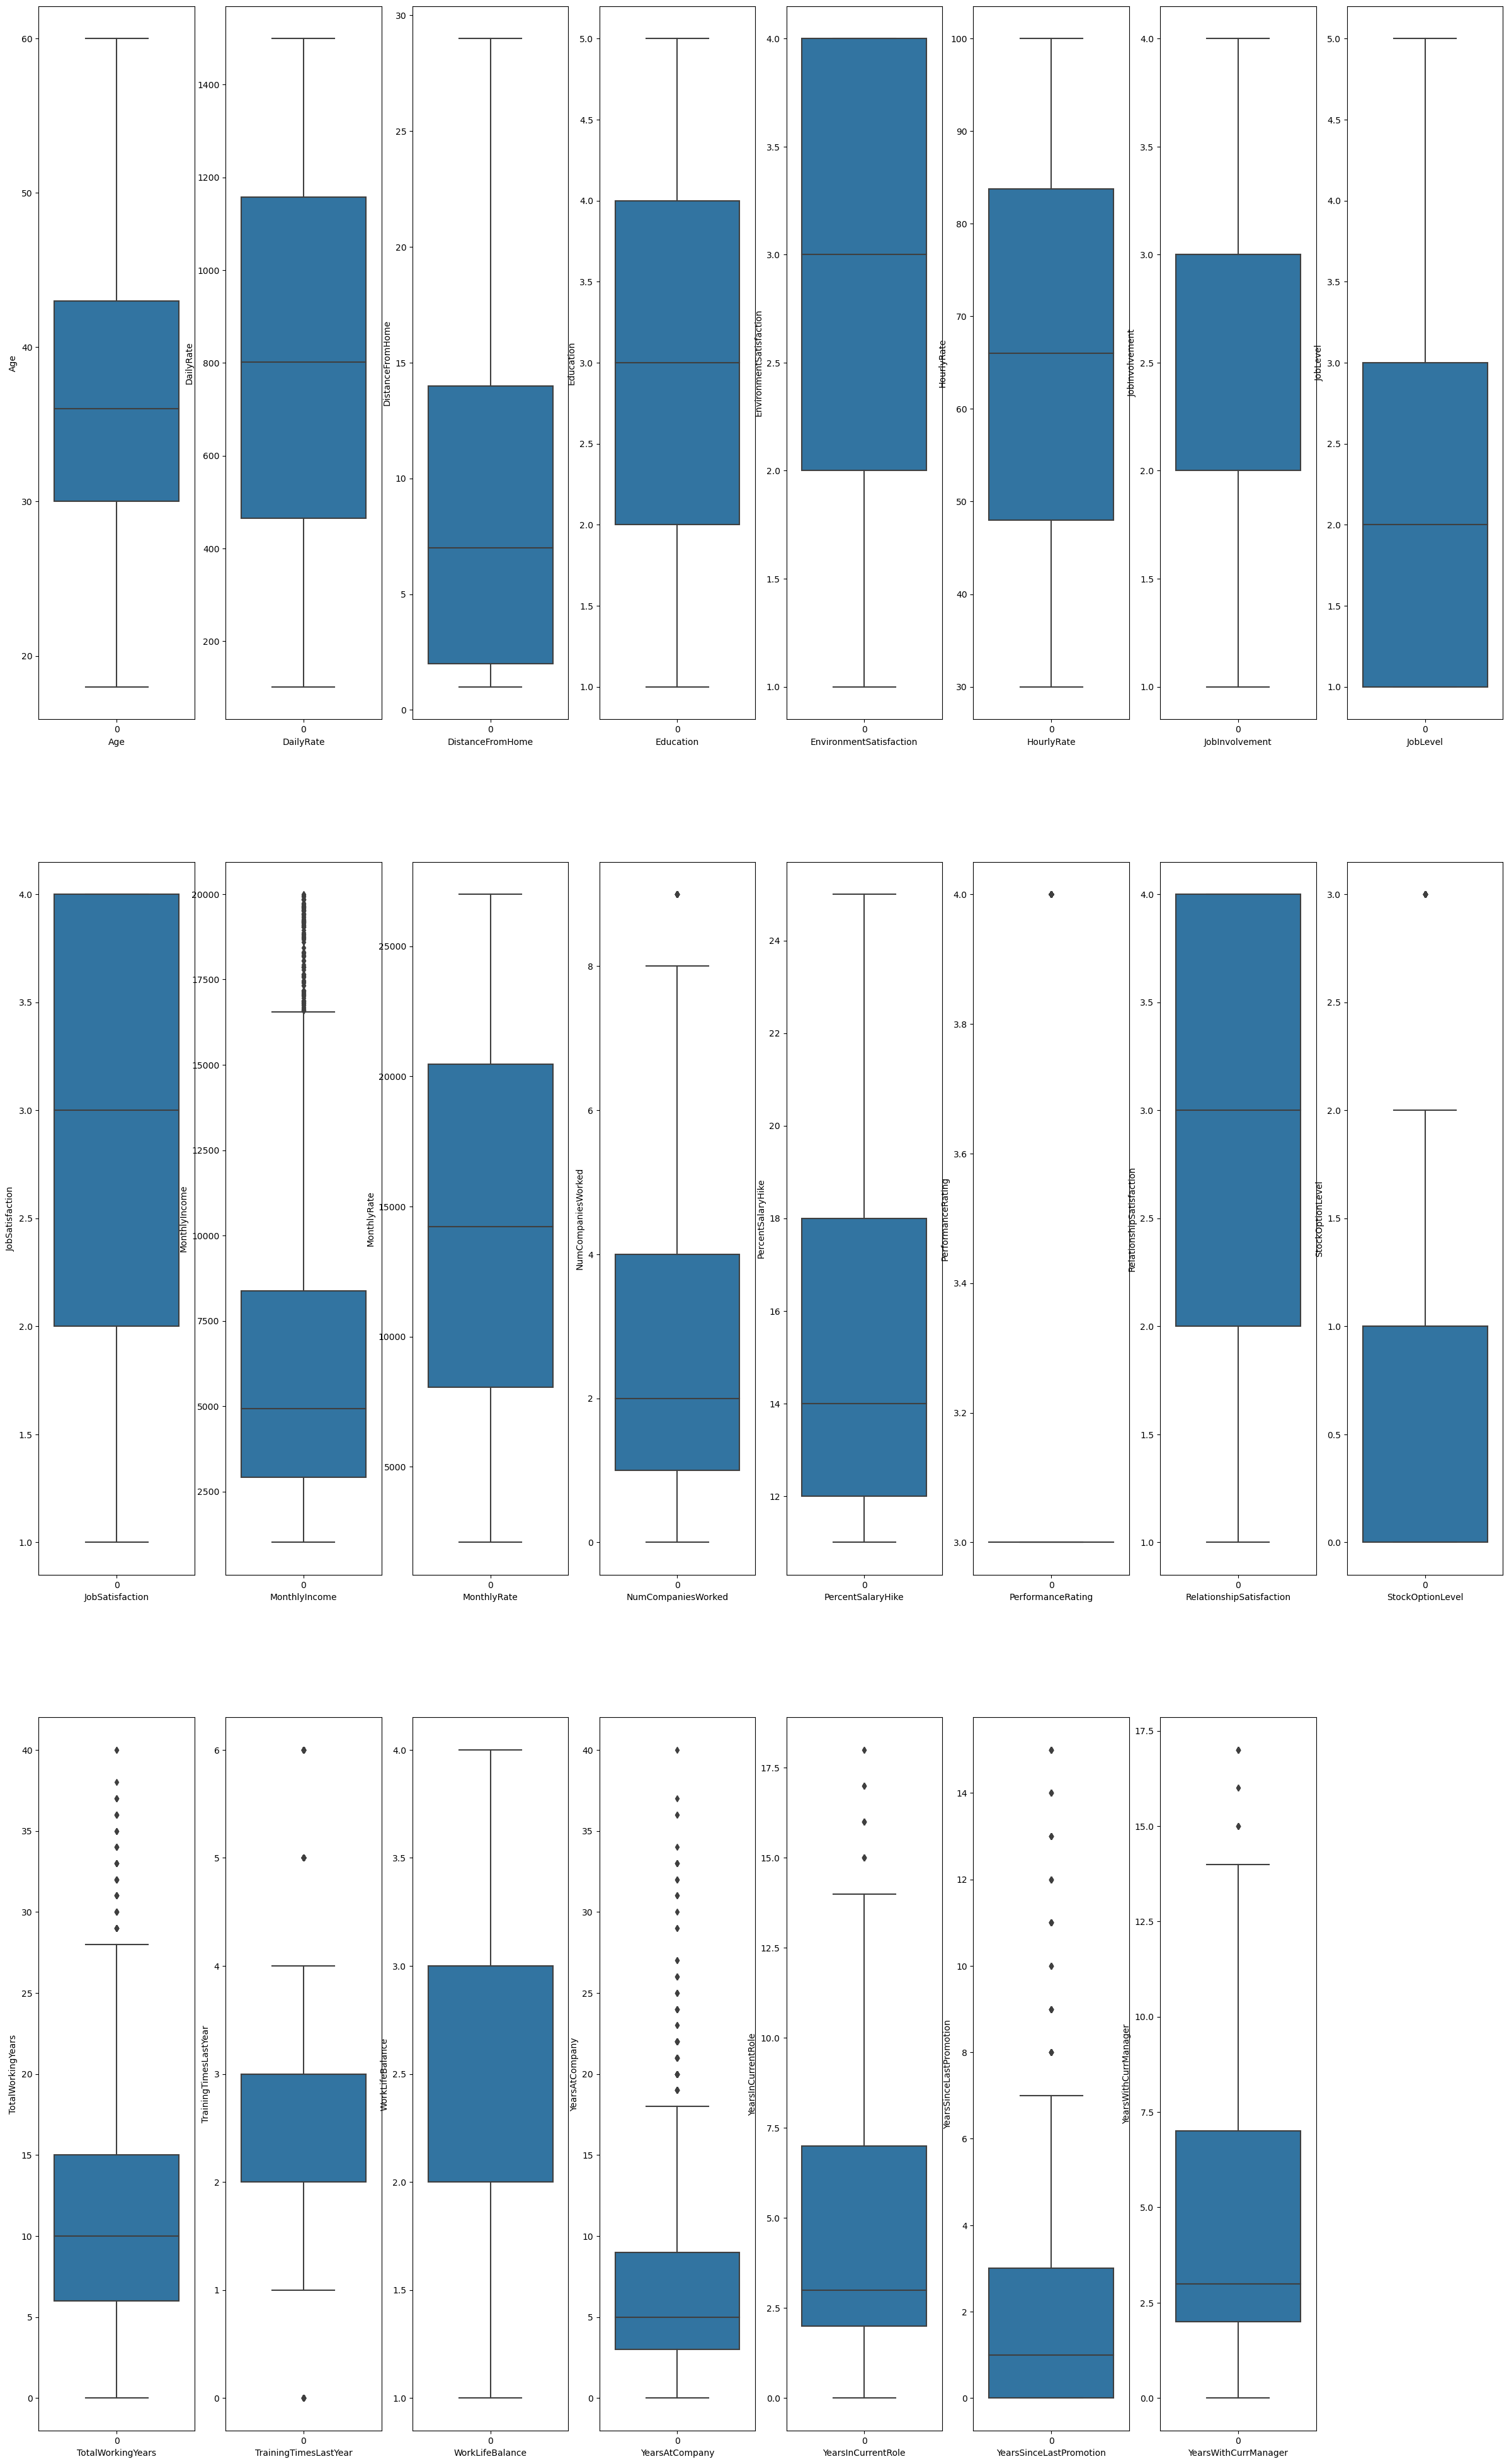

In [362]:
#Now let us also draw the boxplot to see the outiers present or not
plt.figure(figsize=(30,50))
plotnumber=1
for i in  integer_columns:
    plt.subplot(3,8,plotnumber)
    sns.boxplot(data[i])
    plt.ylabel(i)
    plt.xlabel(i)
    plotnumber+=1
plt.show()

Most of the columns are now clean and we only care about the continous columns not the categorical

In [457]:
columns_with_outliers=['MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion']

In [459]:
data[columns_with_outliers]

,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,5993,8,6,4,0
1,5130,10,10,7,1
2,2090,7,0,0,0
3,2909,8,8,7,3
4,3468,6,2,2,2
...,...,...,...,...,...
1465,2571,17,5,2,0
1466,9991,9,7,7,1
1467,6142,6,6,2,0
1468,5390,17,9,6,0


There are 5 columns with outliers now let us analyse them and treat them

In [460]:
for i in columns_with_outliers:
    print(data[i].value_counts())

MonthlyIncome
2342     4
6142     3
2741     3
2559     3
2610     3
        ..
7104     1
2773     1
19513    1
3447     1
4404     1
Name: count, Length: 1349, dtype: int64
TotalWorkingYears
10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: count, dtype: int64
YearsAtCompany
5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30    

Here only the monthlyIncome is a continous data rest all can be classified very well
And the issue with monthly income is that a company has very high salary also and very low salary also depending 
upon variours factors so we can not just directly delete these data as they can also be very important for us
One thing we can do is that we will transform this column.

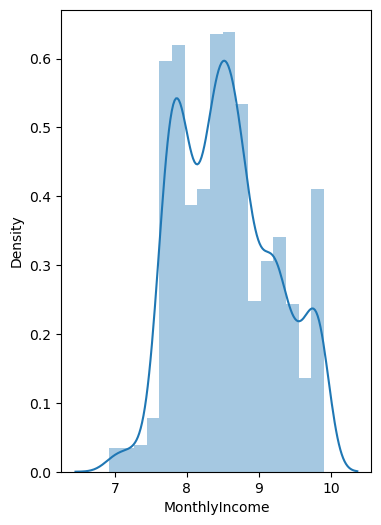

In [461]:
plt.figure(figsize=(4,6))
sns.distplot(np.log(data['MonthlyIncome']))
plt.show()

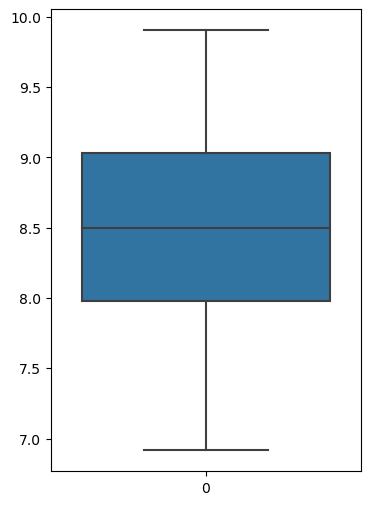

In [462]:
#Boxplot
plt.figure(figsize=(4,6))
sns.boxplot(np.log(data['MonthlyIncome']))
plt.show()

In [463]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


We will have to encode the attrition column if we want to see the relation

In [464]:
from sklearn.preprocessing import LabelEncoder

In [465]:
lab_enc=LabelEncoder()

In [466]:
data['Attrition']=lab_enc.fit_transform(data['Attrition'])

In [467]:
correlation = data['Attrition'].corr(data['MonthlyIncome'])
print("Correlation between Attrition and MonthlyIncome:", correlation)

Correlation between Attrition and MonthlyIncome: -0.15983958238498855


In [468]:
#Let us see the realtion after transformation
correlation = data['Attrition'].corr(np.log(data['MonthlyIncome']))
print("Correlation between Attrition and MonthlyIncome:", correlation)

Correlation between Attrition and MonthlyIncome: -0.19821035799240516


So let us also visualize the relation 

In [469]:
data['Attrition']=data['Attrition'].replace({0:'NO',1:'YES'})

In [471]:
data['Attrition'].value_counts()

Attrition
NO     1233
YES     237
Name: count, dtype: int64

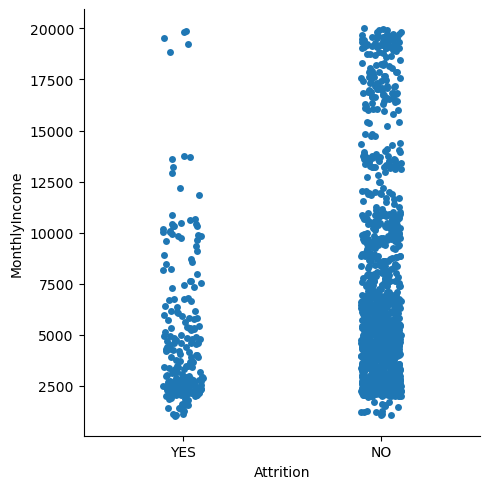

In [472]:
sns.catplot(x='Attrition',y='MonthlyIncome',data=data)
plt.show()

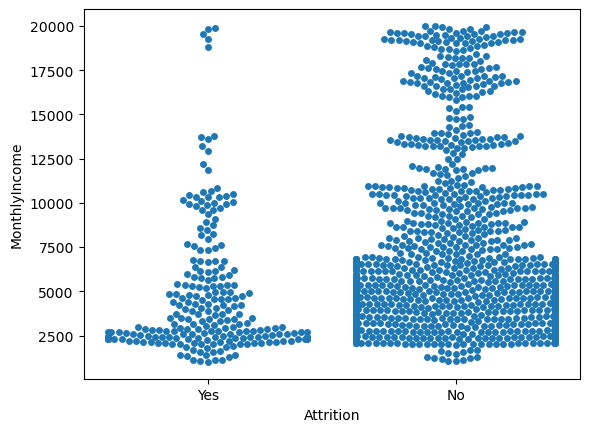

In [82]:
sns.swarmplot(x='Attrition',y='MonthlyIncome',data=data)
plt.show()

From this we can see that the employees who have attritated from the company seem to have a less salary than those who are
working even now

Let us see the the log comparision now

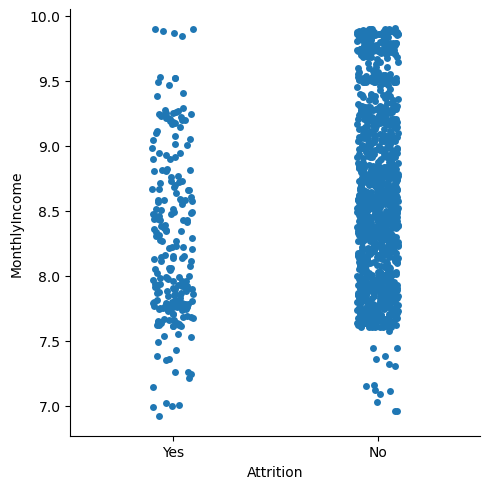

In [84]:
sns.catplot(x=data['Attrition'],y=np.log(data['MonthlyIncome']))
plt.show()

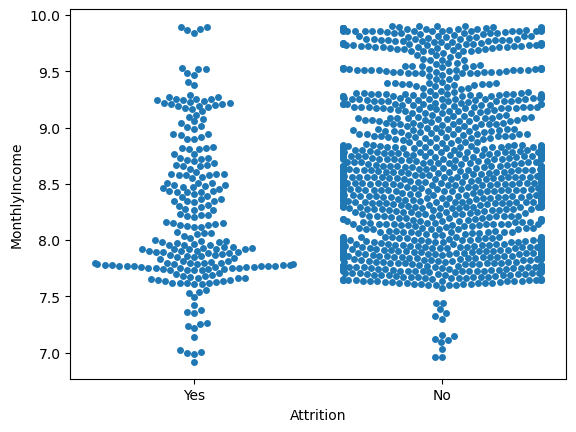

In [85]:
sns.swarmplot(x=data['Attrition'],y=np.log(data['MonthlyIncome']))
plt.show()

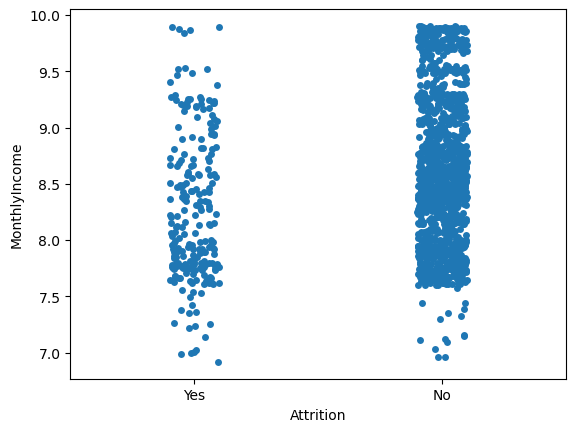

In [86]:
sns.stripplot(x=data['Attrition'],y=np.log(data['MonthlyIncome']))
plt.show()

So we can see that the graph is more saturated as of now
And we can use the log of the monthly income.

In [473]:
data['New_MonthlyIncome']=data['MonthlyIncome']
#we have added a new column we will use this to visualize the relation and will delete this later on

In [484]:
data['New_MonthlyIncome']

0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: New_MonthlyIncome, Length: 1470, dtype: int64

In [483]:
#So we can clearly see that the outliers are removed now
data['MonthlyIncome']=np.log(data['MonthlyIncome'])

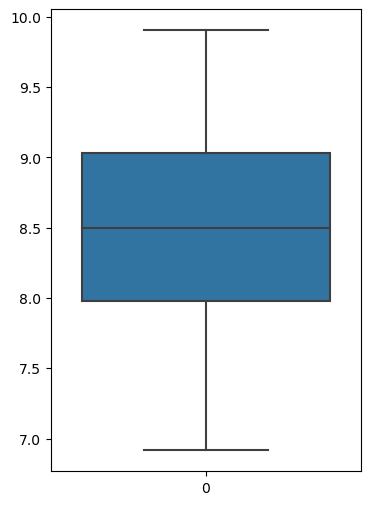

In [485]:
plt.figure(figsize=(4,6))
sns.boxplot(data['MonthlyIncome'])
plt.show()

We have succesfully treated the outliers in the data

Now let us compare various columns with the label

In [489]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,New_MonthlyIncome
0,41,YES,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,8.698347,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,5993
1,49,NO,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,8.542861,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,5130
2,37,YES,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,7.644919,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2090
3,33,NO,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,7.975565,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,2909
4,27,NO,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,8.151333,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,3468


Now let us compare various columns with the label

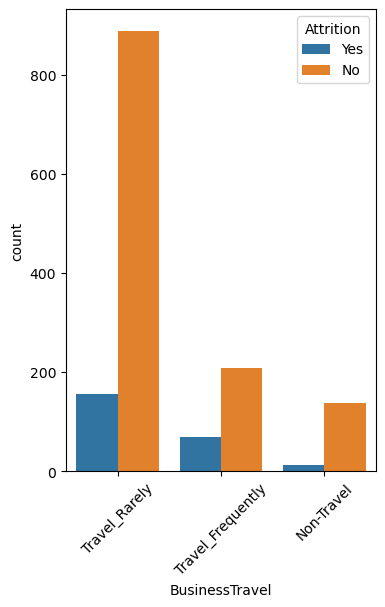

In [93]:
#Bussiness Travel
plt.figure(figsize=(4,6))
sns.countplot(x='BusinessTravel',hue='Attrition',data=data)
plt.xticks(rotation=45)
plt.show()

So attrition is relatively very low in the non_travel and is most frequent in the travel_rare. Altough the sample of travel
rare is also high 

In [94]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,8.698347,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,8.542861,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,7.644919,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,7.975565,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,8.151333,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


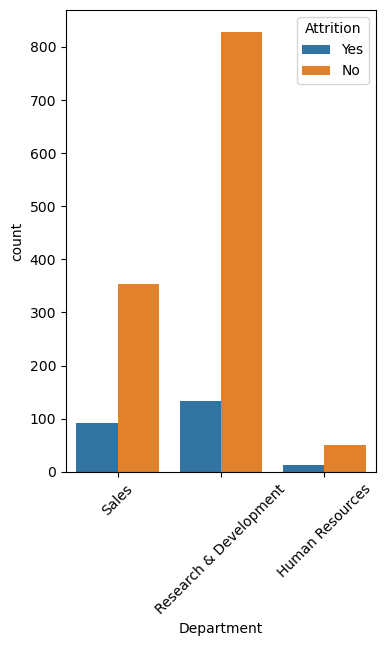

In [96]:
#Department
plt.figure(figsize=(4,6))
sns.countplot(x='Department',hue='Attrition',data=data)
plt.xticks(rotation=45)
plt.show()

We can see that the research and development has the most attrition and it has the most number of employees also
And moreover one thing to notice is that the ratio of attrition over the no. of employees is same in all the departments

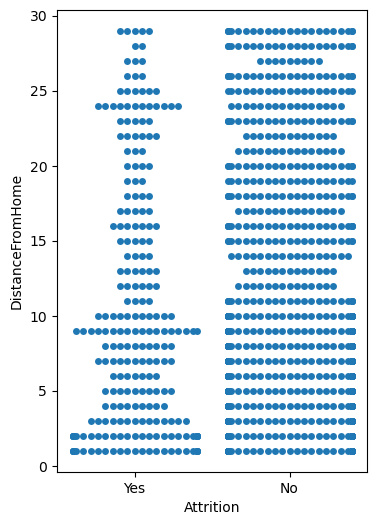

In [101]:
#Distance from home
plt.figure(figsize=(4,6))
sns.swarmplot(x=data['Attrition'],y=data['DistanceFromHome'])
plt.show()

In [99]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,8.698347,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,8.542861,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,7.644919,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,7.975565,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,8.151333,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


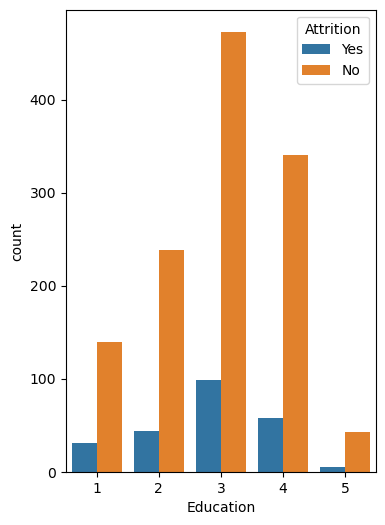

In [105]:
#Distance from home
plt.figure(figsize=(4,6))
sns.countplot(x=data['Education'],hue=data['Attrition'])
plt.show()

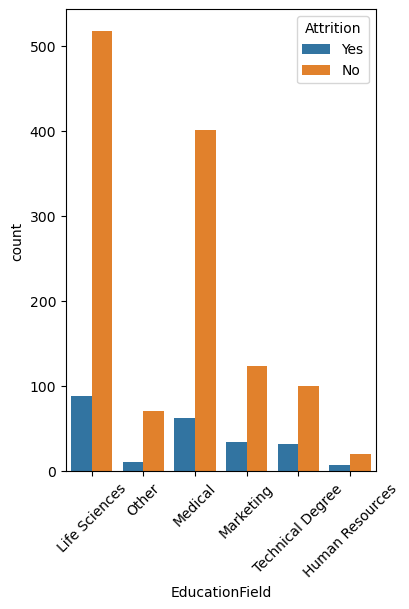

In [107]:
#Education field
plt.figure(figsize=(4,6))
sns.countplot(x=data['EducationField'],hue=data['Attrition'])
plt.xticks(rotation=45)
plt.show()

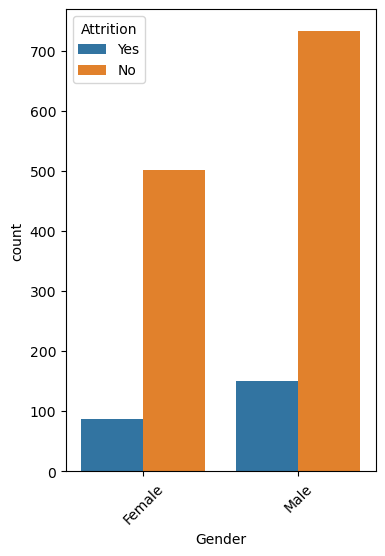

In [108]:
#Gender
#Education field
plt.figure(figsize=(4,6))
sns.countplot(x=data['Gender'],hue=data['Attrition'])
plt.xticks(rotation=45)
plt.show()

Male employees are more in the organization as compared to the female employees and thus they have high attrition also

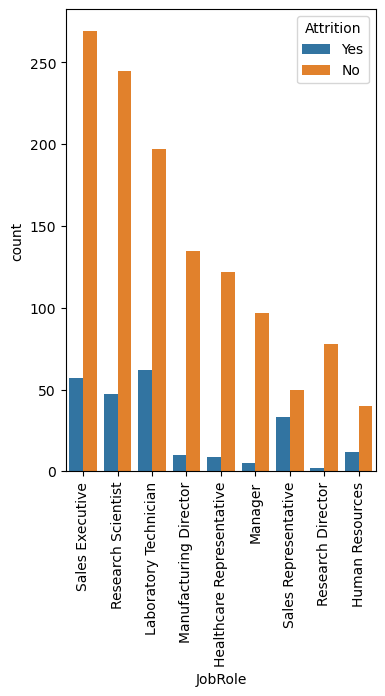

In [111]:
#Job Role
plt.figure(figsize=(4,6))
sns.countplot(x=data['JobRole'],hue=data['Attrition'])
plt.xticks(rotation=90)
plt.show()

We can see in this graph clearly that the manufacturing directors , healthcare representative, managers and the research
directors have the least no. of attrition

Let us see more about the different job roles

In [490]:
data.groupby(['JobRole'])['New_MonthlyIncome'].mean()

JobRole
Healthcare Representative     7528.763359
Human Resources               4235.750000
Laboratory Technician         3237.169884
Manager                      17181.676471
Manufacturing Director        7295.137931
Research Director            16033.550000
Research Scientist            3239.972603
Sales Executive               6924.279141
Sales Representative          2626.000000
Name: New_MonthlyIncome, dtype: float64

Here we can clearly see that the manufacturing director, managers and the research directors have high salary as compared to
the other that could be one of the reasons why they have not changed the company or left the job

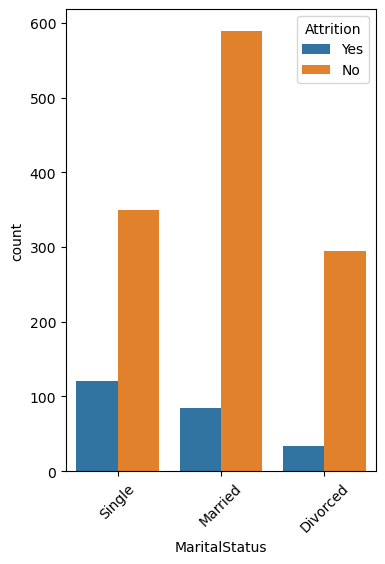

In [130]:
#Marital status
plt.figure(figsize=(4,6))
sns.countplot(x=data['MaritalStatus'],hue=data['Attrition'])
plt.xticks(rotation=45)
plt.show()

The divorced ones have not very les attrition ratio maybe because they do not want to change anymore

In [135]:
data.groupby(['MaritalStatus','Gender','Attrition'])['DistanceFromHome'].mean()

MaritalStatus  Gender  Attrition
Divorced       Female  No            8.407407
                       Yes          10.111111
               Male    No            9.225806
                       Yes          11.000000
Married        Female  No            9.360996
                       Yes          13.064516
               Male    No            9.126437
                       Yes           9.981132
Single         Female  No            8.565789
                       Yes           9.659574
               Male    No            8.257576
                       Yes          10.643836
Name: DistanceFromHome, dtype: float64

In this we have come through a new relation be it male or female, single , married or divorced the one whose average distance
from home is more seems to have more attrition as compared to one whose average distance from home is less.
This may be because of the fact that when you are close to your home than you do not want to go to a new place 
anymore. And when you are far from your home than it does not matter which new place you go. You will still  be far from
your home.

In [136]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,New_MonthlyIncome
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,8.698347,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,5993
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,8.542861,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,5130
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,7.644919,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2090
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,7.975565,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,2909
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,8.151333,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,3468


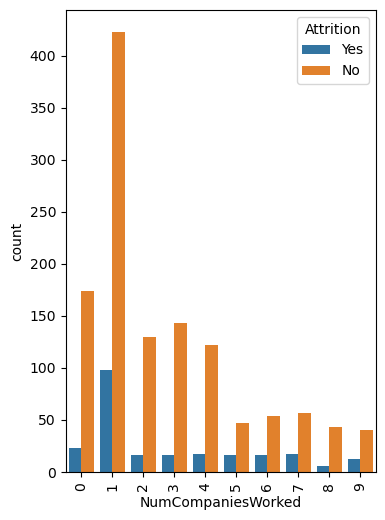

In [141]:
#Number of companies worked
plt.figure(figsize=(4,6))
sns.countplot(x=data['NumCompaniesWorked'],hue=data['Attrition'])
plt.xticks(rotation=90)
plt.show()

The new employee who have worked for 1 company seems to have a high attrition rate may be because of the fact that
they want to explore more or they want to get a hike after changing the company

In [147]:
data.groupby(['NumCompaniesWorked'])['New_MonthlyIncome'].mean()

NumCompaniesWorked
0    5805.238579
1    5259.963532
2    7688.678082
3    8270.547170
4    7206.553957
5    6984.269841
6    7104.385714
7    7812.081081
8    6628.040816
9    7611.096154
Name: New_MonthlyIncome, dtype: float64

See my analysis was right the employees who have worked for one company have the lowest salary and this might  be the potential reason why they want to change the company now

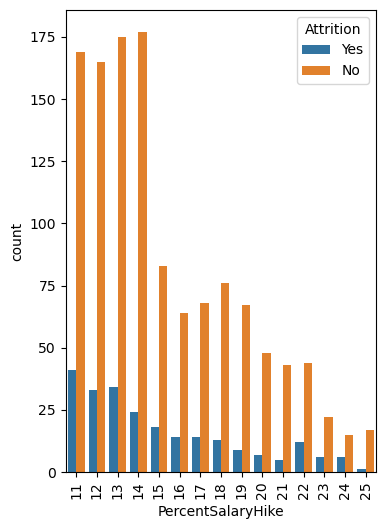

In [150]:
#PercentSalaryHike
plt.figure(figsize=(4,6))
sns.countplot(x=data['PercentSalaryHike'],hue=data['Attrition'])
plt.xticks(rotation=90)
plt.show()

In [157]:
data.groupby(['PercentSalaryHike','Gender','Attrition'])['New_MonthlyIncome'].mean()

PercentSalaryHike  Gender  Attrition
11                 Female  No           8013.013333
                           Yes          4088.625000
                   Male    No           7295.702128
                           Yes          5654.360000
12                 Female  No           6650.583333
                           Yes          5701.700000
                   Male    No           6434.989247
                           Yes          6396.000000
13                 Female  No           6425.134328
                           Yes          3153.636364
                   Male    No           6488.777778
                           Yes          4938.000000
14                 Female  No           7342.357143
                           Yes          4111.000000
                   Male    No           7120.981308
                           Yes          3603.176471
15                 Female  No           5987.034483
                           Yes          6831.250000
                   Male    

From the above analysis it is clear that even after getting better hikes the employees whose salary is still less have more
attrition because at the end of the day the thing that matters is money and we can also see this here.
Employees with less salary have more attrition
And whose salary hike is less have also more attrition regardless of the fact whether they had high or low salary as compared to
the other.

In [158]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,New_MonthlyIncome
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,8.698347,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,5993
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,8.542861,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,5130
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,7.644919,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2090
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,7.975565,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,2909
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,8.151333,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,3468


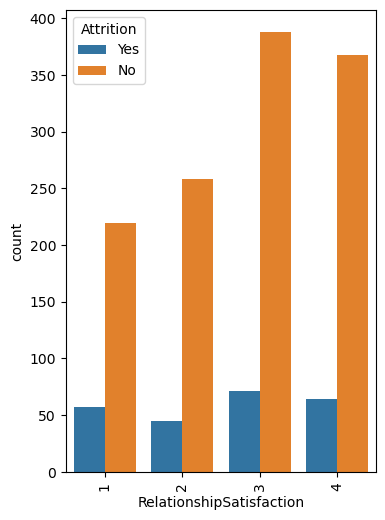

In [159]:
#RelationshipSatisfaction
plt.figure(figsize=(4,6))
sns.countplot(x=data['RelationshipSatisfaction'],hue=data['Attrition'])
plt.xticks(rotation=90)
plt.show()

Here the ratio is moreover the same overall so not much for analysis here

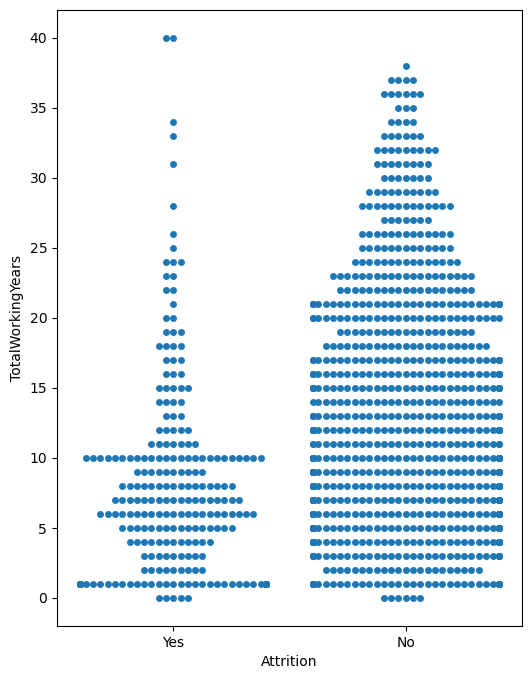

In [163]:
#Total working years
plt.figure(figsize=(6,8))
sns.swarmplot(x=data['Attrition'],y=data['TotalWorkingYears'])
plt.show()

See from this graph it is clear that the young employees or the employees who have less experience have more attrition rate.
The reason for this might be the fact that the young employees want to explore more as compared to the experienced ones.

In [167]:
data.groupby(['Attrition'])['TotalWorkingYears'].mean()

Attrition
No     11.862936
Yes     8.244726
Name: TotalWorkingYears, dtype: float64

See from the graph also and from the group by also the employees with more attrition have less working experience

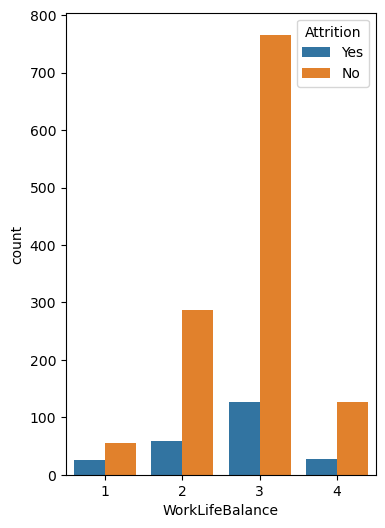

In [168]:
#worklifebalance
plt.figure(figsize=(4,6))
sns.countplot(x=data['WorkLifeBalance'],hue=data['Attrition'])
plt.show()

The employees with worst worklife balance have more attrition rate as compared to the ones who have better worklifebalance

In [169]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,New_MonthlyIncome
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,8.698347,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,5993
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,8.542861,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,5130
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,7.644919,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2090
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,7.975565,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,2909
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,8.151333,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,3468


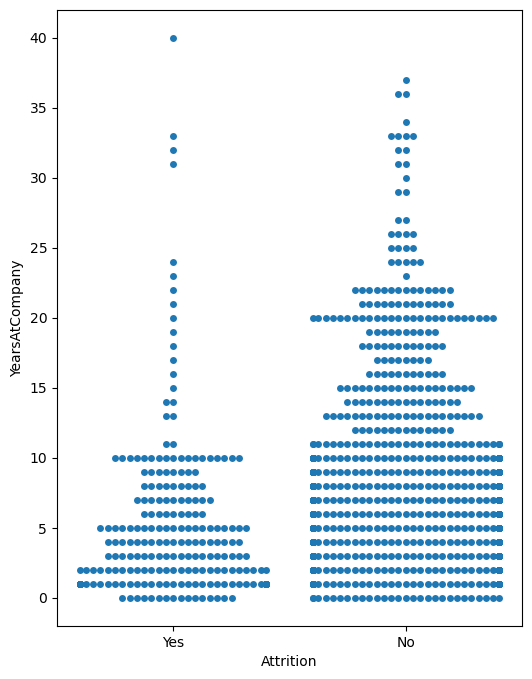

In [172]:
#yearsAtthecompany
plt.figure(figsize=(6,8))
sns.swarmplot(x=data['Attrition'],y=data['YearsAtCompany'])
plt.show()

The new employees seem to have high attrition rate as compared to the ones who have been in the company for longe duration

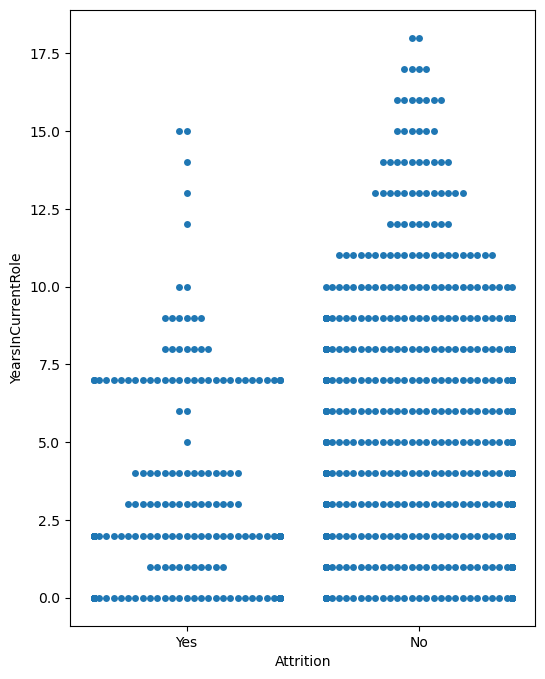

In [175]:
#yearsincurrectrole
plt.figure(figsize=(6,8))
sns.swarmplot(x=data['Attrition'],y=data['YearsInCurrentRole'])
plt.show()

In [180]:
data.groupby(['Attrition'])['YearsInCurrentRole'].mean()

Attrition
No     4.484185
Yes    2.902954
Name: YearsInCurrentRole, dtype: float64

So from these above two analysis it is clear that the employees who have been in the current role for longer times have low
Attrition rate than the employees who have been in the current role for less number of times

In [182]:
#YearsSinceLastPromotion
data['YearsSinceLastPromotion'].value_counts()

YearsSinceLastPromotion
0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: count, dtype: int64

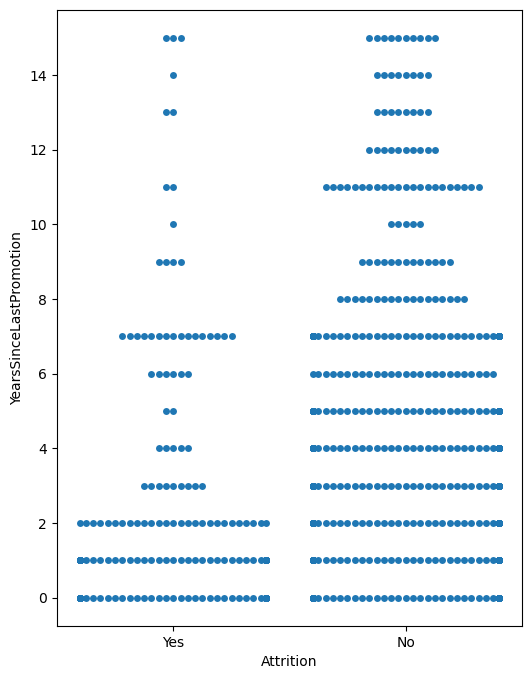

In [183]:
plt.figure(figsize=(6,8))
sns.swarmplot(x=data['Attrition'],y=data['YearsSinceLastPromotion'])
plt.show()

<Figure size 600x800 with 0 Axes>

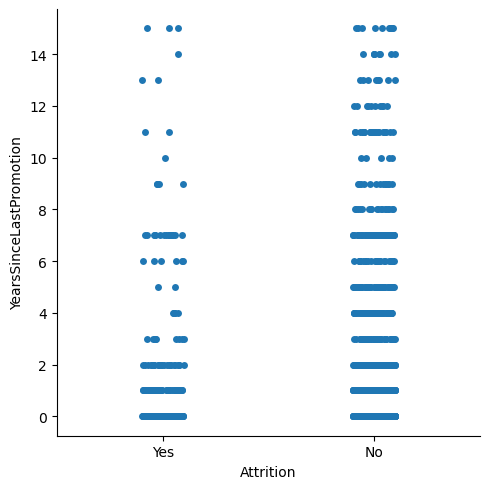

In [184]:
plt.figure(figsize=(6,8))
sns.catplot(x=data['Attrition'],y=data['YearsSinceLastPromotion'])
plt.show()

In [186]:
data.groupby(['Attrition'])['YearsSinceLastPromotion'].mean()

Attrition
No     2.234388
Yes    1.945148
Name: YearsSinceLastPromotion, dtype: float64

From the above analysis, we came to know a very shocking fact that the employees who have not been given promotion for longer periods are still in the company as compared to those who have been given promotions more frequently. The employees who have been given promotions more frequently have more attrition.

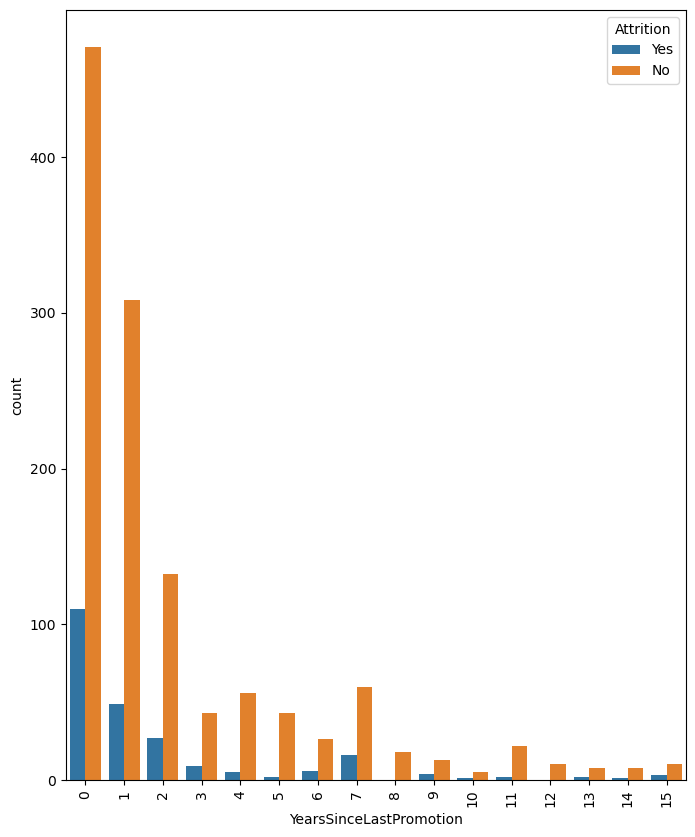

In [193]:
plt.figure(figsize=(8,10))
sns.countplot(x=data['YearsSinceLastPromotion'],hue=data['Attrition'])
plt.xticks(rotation=90)
plt.show()

From this graph, the trend is also consistent. The employees who have been given promotions less than a year ago have the highest attrition rate. I think that when they received the promotion, they may have considered changing companies to secure an even better salary.

In [196]:
data.groupby('YearsSinceLastPromotion')['Age'].mean()

YearsSinceLastPromotion
0     35.641997
1     36.190476
2     36.591195
3     37.942308
4     40.770492
5     37.533333
6     37.843750
7     38.750000
8     36.777778
9     40.235294
10    37.000000
11    41.625000
12    44.900000
13    46.800000
14    46.333333
15    48.153846
Name: Age, dtype: float64

The average age of the employee who have been promoted less than a year ago is also less that is why they want to explore more

In [197]:
data.groupby('YearsSinceLastPromotion')['New_MonthlyIncome'].mean()

YearsSinceLastPromotion
0      5499.640275
1      5966.568627
2      5898.704403
3      6833.365385
4      9621.852459
5      7239.822222
6      8517.750000
7      7080.947368
8      8010.500000
9      8873.058824
10     7499.666667
11    12329.333333
12    12532.400000
13    13847.000000
14    14735.000000
15    14225.923077
Name: New_MonthlyIncome, dtype: float64

The salary of the employees with prommotion in less than year ago and 1 year ago is also the lowest as commpared to others and
their age is also less. And this is the potential reason for their more attrition rate.

In [202]:
data.groupby(['Gender','YearsSinceLastPromotion'])[['New_MonthlyIncome','Age']].mean()

New_MonthlyIncome        Age
Gender YearsSinceLastPromotion                              
Female 0                              5601.096491  35.942982
       1                              6329.950000  36.778571
       2                              5887.890909  36.709091
       3                              6857.583333  37.875000
       4                             10205.370370  41.037037
       5                              8688.391304  39.739130
       6                              8397.857143  38.571429
       7                              6628.843750  39.375000
       8                              9222.888889  35.777778
       9                             10708.142857  39.571429
       10                             6478.666667  35.333333
       11                            11454.333333  42.333333
       12                             9361.400000  44.600000
       13                            13151.000000  50.333333
       14                            10384.000000  43.500000
       15                            12493.571429  44.142857
Male   0                              5434.110482  35.447592
       1                              5732.129032  35.811060
       2                              5904.423077  36.528846
       3                              6812.607143  38.000000
       4                              9158.470588  40.558824
       5                              5725.409091  35.227273
       6                              8611.000000  37.277778
       7                              7409.750000  38.295455
       8                              6798.111111  37.777778
       9                              7588.500000  40.700000
       10                             8520.666667  38.666667
       11                            12854.333333  41.200000
       12                            15703.400000  45.200000
       13                            14145.285714  45.285714
       14                            15978.142857  47.142857
       15                            16247.000000  52.833333

So one thing is crystal clear regardless of the gender the employees with less salary and less age have more attrition even after most frequent promotions.This maybe because of the fact that they have less age and more time to explore and that is
why they are more inclined to explore more opportunities in their career.

In [203]:
#Years with currect manager
data['YearsWithCurrManager'].value_counts()

YearsWithCurrManager
2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
15      5
14      5
16      2
Name: count, dtype: int64

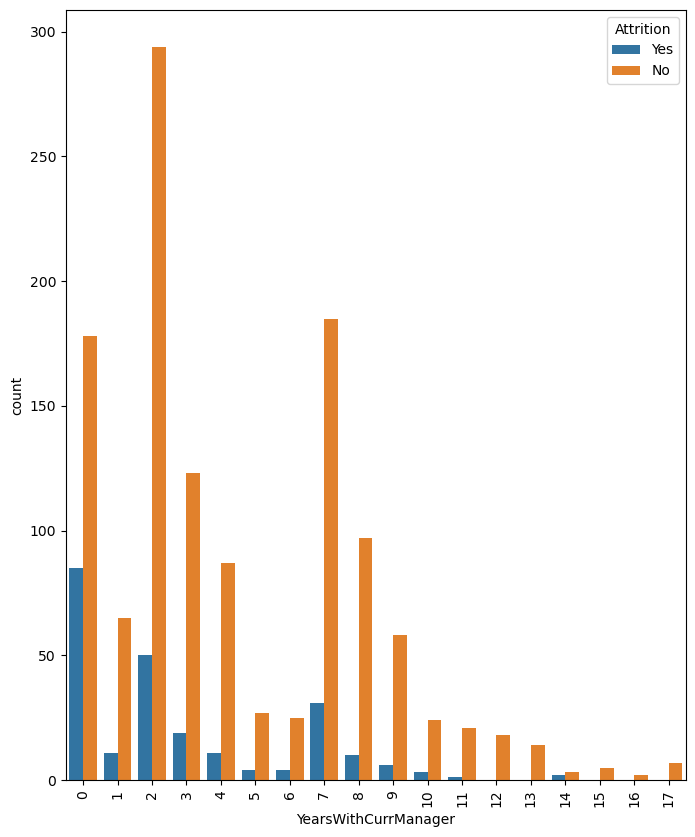

In [206]:
plt.figure(figsize=(8,10))
sns.countplot(x=data['YearsWithCurrManager'],hue=data['Attrition'])
plt.xticks(rotation=90)
plt.show()

The employees who are new with the currect manager have more attrition

In [209]:
data.groupby(['Attrition'])['YearsWithCurrManager'].mean()

Attrition
No     4.367397
Yes    2.852321
Name: YearsWithCurrManager, dtype: float64

From this it is also clear.The ones who have worked more with the current manager have less attrition as compared to the ones
who are new.

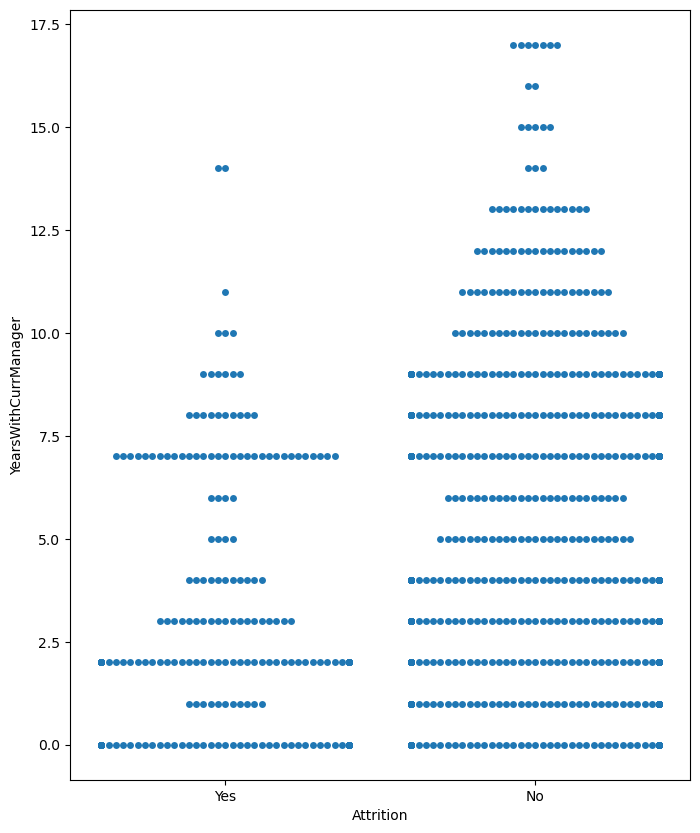

In [211]:
plt.figure(figsize=(8,10))
sns.swarmplot(x=data['Attrition'],y=data['YearsWithCurrManager'])
plt.show()

From this graph and analsis it is also clear

The analysis part is over now let us move to the model building phase.

In [491]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,New_MonthlyIncome
0,41,YES,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,8.698347,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,5993
1,49,NO,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,8.542861,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,5130
2,37,YES,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,7.644919,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2090
3,33,NO,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,7.975565,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,2909
4,27,NO,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,8.151333,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,3468


Now we will move ahead to the model building phase where we will encode the data with caterories and will
treat the multicollinearity issues of the data to make a grea

In [492]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [493]:
data['Age'].value_counts().sort_index(ascending=True)

Age
18     8
19     9
20    11
21    13
22    16
23    14
24    26
25    26
26    39
27    48
28    48
29    68
30    60
31    69
32    61
33    58
34    77
35    78
36    69
37    50
38    58
39    42
40    57
41    40
42    46
43    32
44    33
45    41
46    33
47    24
48    19
49    24
50    30
51    19
52    18
53    19
54    18
55    22
56    14
57     4
58    14
59    10
60     5
Name: count, dtype: int64

In [494]:
def age(value):
    if value in list(range(18,29)):
        return 'Young'
    if value in list(range(29,40)):
        return 'Middle Age'
    if value in list(range(40,51)):
        return 'Old age'
    if value in list(range(51,61)):
        return 'Close to retirement'

In [495]:
data['Age']=data['Age'].apply(age)

In [496]:
data['Age'].value_counts()

Age
Middle Age             690
Old age                379
Young                  258
Close to retirement    143
Name: count, dtype: int64

In [497]:
data['Age']=lab_enc.fit_transform(data['Age'])

In [498]:
data['Age'].value_counts()

Age
1    690
2    379
3    258
0    143
Name: count, dtype: int64

In [499]:
data['Age']=data['Age']+1

In [500]:
data['Age'].value_counts()

Age
2    690
3    379
4    258
1    143
Name: count, dtype: int64

We have done this because we do want any class to have 0

In [501]:
data['Attrition']=lab_enc.fit_transform(data['Attrition'])
data['Attrition']=data['Attrition']+1
data['Attrition'].value_counts()

Attrition
1    1233
2     237
Name: count, dtype: int64

In [502]:
data['BusinessTravel']=lab_enc.fit_transform(data['BusinessTravel'])

In [503]:
data['BusinessTravel']=data['BusinessTravel']+1
data['BusinessTravel'].value_counts()

BusinessTravel
3    1043
2     277
1     150
Name: count, dtype: int64

In [504]:
#we can combine the class 1 and 2 together
def travel(value):
    if value==3:
        return 3
    else:
        return 2
data['BusinessTravel']=data['BusinessTravel'].apply(travel)
data['BusinessTravel'].value_counts()

BusinessTravel
3    1043
2     427
Name: count, dtype: int64

In [505]:
data['DailyRate'].value_counts()
#It is a continous column and does not needs any encoding

DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64

In [506]:
data['Department']=lab_enc.fit_transform(data['Department'])
data['Department']=data['Department']+1
data['Department'].value_counts()

Department
2    961
3    446
1     63
Name: count, dtype: int64

In [507]:
#combining 1 and 3 together
def department(value):
    if value==2:
        return 2
    else:
         return 1
data['Department']=data['Department'].apply(department)
data['Department'].value_counts()

Department
2    961
1    509
Name: count, dtype: int64

In [508]:
data['DistanceFromHome'].value_counts().sort_index(ascending=False)

DistanceFromHome
29     27
28     23
27     12
26     25
25     25
24     28
23     27
22     19
21     18
20     25
19     22
18     26
17     20
16     32
15     26
14     21
13     19
12     20
11     29
10     86
9      85
8      80
7      84
6      59
5      65
4      64
3      84
2     211
1     208
Name: count, dtype: int64

In [509]:
def distance(value):
    if value in list(range(1,6)):
        return 'Near'
    if value in list(range(6,16)):
        return 'Less nearer'
    if value in list(range(16,30)):
        return 'Far'

In [510]:
data['DistanceFromHome']=data['DistanceFromHome'].apply(distance)
data['DistanceFromHome']=lab_enc.fit_transform(data['DistanceFromHome'])
data['DistanceFromHome']=data['DistanceFromHome']+1
data['DistanceFromHome'].value_counts()

DistanceFromHome
3    632
2    509
1    329
Name: count, dtype: int64

In [511]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,New_MonthlyIncome
0,3,2,3,1102,1,3,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,8.698347,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,5993
1,3,1,2,279,2,2,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,8.542861,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,5130
2,2,2,3,1373,2,3,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,7.644919,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2090
3,2,1,2,1392,2,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,7.975565,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,2909
4,4,1,3,591,2,3,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,8.151333,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,3468


In [512]:
data['Education'].value_counts()
#This column is already encoded

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [513]:
data['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [514]:
data['EducationField']=lab_enc.fit_transform(data['EducationField'])
data['EducationField']=data['EducationField']+1
data['EducationField'].value_counts()

EducationField
2    606
4    464
3    159
6    132
5     82
1     27
Name: count, dtype: int64

In [515]:
def education(value):
    if value!= 5 and value !=1:
        return value
    else:
        return 1
data['EducationField']=data['EducationField'].apply(education)
data['EducationField'].value_counts()

EducationField
2    606
4    464
3    159
6    132
1    109
Name: count, dtype: int64

In [516]:
data['EnvironmentSatisfaction'].value_counts()
#Already encoded

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64

In [517]:
data['Gender']=lab_enc.fit_transform(data['Gender'])
data['Gender']=data['Gender']+1
data['Gender'].value_counts()

Gender
2    882
1    588
Name: count, dtype: int64

In [518]:
data['HourlyRate'].value_counts().sort_index()

HourlyRate
30     19
31     15
32     24
33     19
34     12
       ..
96     27
97     21
98     28
99     20
100    19
Name: count, Length: 71, dtype: int64

In [519]:
def hourlyrate(value):
    if value in list(range(30,51)):
        return 'Low'
    if value in list(range(51,81)):
        return 'medium'
    if value in list(range(81,101)):
        return 'High'

In [520]:
data['HourlyRate']=data['HourlyRate'].apply(hourlyrate)
data['HourlyRate'].value_counts()

HourlyRate
medium    626
High      435
Low       409
Name: count, dtype: int64

In [521]:
data['HourlyRate']=lab_enc.fit_transform(data['HourlyRate'])
data['HourlyRate']=data['HourlyRate']+1
data['HourlyRate'].value_counts()

HourlyRate
3    626
1    435
2    409
Name: count, dtype: int64

In [522]:
data['JobInvolvement'].value_counts()
#already encoded

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

In [523]:
def jobinvolvement(value):
    if value !=1 and value !=4:
        return value
    else:
        return 1
data['JobInvolvement']=data['JobInvolvement'].apply(jobinvolvement)
data['JobInvolvement'].value_counts()

JobInvolvement
3    868
2    375
1    227
Name: count, dtype: int64

In [524]:
data['JobLevel'].value_counts()
#already encoded

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [525]:
def joblevel(value):
    if value != 4 and value !=5:
        return value
    else:
        return 4
data['JobLevel']=data['JobLevel'].apply(joblevel)
data['JobLevel'].value_counts()

JobLevel
1    543
2    534
3    218
4    175
Name: count, dtype: int64

In [526]:
data['JobRole']=lab_enc.fit_transform(data['JobRole'])

In [527]:
data['JobRole'].value_counts()

JobRole
7    326
6    292
2    259
4    145
0    131
3    102
8     83
5     80
1     52
Name: count, dtype: int64

In [528]:
data['JobSatisfaction'].value_counts()
#It is also already encoded

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [529]:
data['MaritalStatus']=lab_enc.fit_transform(data['MaritalStatus'])
data['MaritalStatus']=data['MaritalStatus']+1
data['MaritalStatus'].value_counts()

MaritalStatus
2    673
3    470
1    327
Name: count, dtype: int64

In [530]:
data['MonthlyIncome'].value_counts()

MonthlyIncome
7.758761    4
8.722906    3
7.916078    3
7.847372    3
7.867106    3
           ..
8.868413    1
7.927685    1
9.878836    1
8.145260    1
8.390268    1
Name: count, Length: 1349, dtype: int64

In [531]:
data['MonthlyRate'].value_counts()

MonthlyRate
4223     3
9150     3
9558     2
12858    2
22074    2
        ..
14561    1
2671     1
5718     1
11757    1
10228    1
Name: count, Length: 1427, dtype: int64

These are continous columns and do not need any interference and we have already removed the outliers of the monthly income 
column.

In [532]:
data['NumCompaniesWorked'].value_counts()
#This column is also already encoded

NumCompaniesWorked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: count, dtype: int64

In [533]:
data['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [534]:
data['OverTime']=lab_enc.fit_transform(data['OverTime'])
data['OverTime']=data['OverTime']+1
data['OverTime'].value_counts()

OverTime
1    1054
2     416
Name: count, dtype: int64

In [535]:
data['PercentSalaryHike'].value_counts().sort_index(ascending=True)

PercentSalaryHike
11    210
12    198
13    209
14    201
15    101
16     78
17     82
18     89
19     76
20     55
21     48
22     56
23     28
24     21
25     18
Name: count, dtype: int64

In [536]:
def salary(value):
    if value in list(range(11,15)):
        return 'Low'
    if value in list(range(15,20)):
        return 'Medium'
    if value in list(range(20,26)):
        return 'High'
data['PercentSalaryHike']=data['PercentSalaryHike'].apply(salary)
data['PercentSalaryHike']=lab_enc.fit_transform(data['PercentSalaryHike'])
data['PercentSalaryHike']=data['PercentSalaryHike']+1
data['PercentSalaryHike'].value_counts()

PercentSalaryHike
2    818
3    426
1    226
Name: count, dtype: int64

In [537]:
data['PerformanceRating'].value_counts()
#Already encoded

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [538]:
data['RelationshipSatisfaction'].value_counts()
#Encoded already

RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

In [539]:
data['StockOptionLevel'].value_counts()

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

In [540]:
def stock(value):
    if value !=2 and value !=3:
        return value
    else:
        return 2
data['StockOptionLevel']=data['StockOptionLevel'].apply(stock)
data['StockOptionLevel'].value_counts()

StockOptionLevel
0    631
1    596
2    243
Name: count, dtype: int64

In [541]:
data['TotalWorkingYears'].value_counts().sort_index(ascending=True)

TotalWorkingYears
0      11
1      81
2      31
3      42
4      63
5      88
6     125
7      81
8     103
9      96
10    202
11     36
12     48
13     36
14     31
15     40
16     37
17     33
18     27
19     22
20     30
21     34
22     21
23     22
24     18
25     14
26     14
27      7
28     14
29     10
30      7
31      9
32      9
33      7
34      5
35      3
36      6
37      4
38      1
40      2
Name: count, dtype: int64

In [542]:
def working(value):
    if value in list(range(0,6)):
        return int(1)
    if value in list(range(6,15)):
        return int(2)
    if value in list(range(15,25)):
        return int(3)
    if value in list(range(25,41)):
        return int(4)
data['TotalWorkingYears']=data['TotalWorkingYears'].apply(working)
data['TotalWorkingYears'].value_counts()

TotalWorkingYears
2    758
1    316
3    284
4    112
Name: count, dtype: int64

In [543]:
data['TrainingTimesLastYear'].value_counts()
#Already encoded

TrainingTimesLastYear
2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: count, dtype: int64

In [544]:
data['WorkLifeBalance'].value_counts()
#Already encoded

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

In [545]:
def worklife(value):
    if value != 4 and value !=1:
        return value
    else:
         return 1

In [546]:
data['WorkLifeBalance']=data['WorkLifeBalance'].apply(worklife)
data['WorkLifeBalance'].value_counts()

WorkLifeBalance
3    893
2    344
1    233
Name: count, dtype: int64

In [547]:
data['YearsAtCompany'].value_counts().sort_index(ascending=True)

YearsAtCompany
0      44
1     171
2     127
3     128
4     110
5     196
6      76
7      90
8      80
9      82
10    120
11     32
12     14
13     24
14     18
15     20
16     12
17      9
18     13
19     11
20     27
21     14
22     15
23      2
24      6
25      4
26      4
27      2
29      2
30      1
31      3
32      3
33      5
34      1
36      2
37      1
40      1
Name: count, dtype: int64

In [548]:
def working(value):
    if value in list(range(0,5)):
        return int(1)
    if value in list(range(5,18)):
        return int(2)
    if value in list(range(18,41)):
        return int(3)
data['YearsAtCompany']=data['YearsAtCompany'].apply(working)
data['YearsAtCompany'].value_counts()

YearsAtCompany
2    773
1    580
3    117
Name: count, dtype: int64

In [549]:
data['YearsInCurrentRole'].value_counts().sort_index(ascending=True)

YearsInCurrentRole
0     244
1      57
2     372
3     135
4     104
5      36
6      37
7     222
8      89
9      67
10     29
11     22
12     10
13     14
14     11
15      8
16      7
17      4
18      2
Name: count, dtype: int64

In [550]:
def role(value):
    if value in list(range(0,5)):
        return int(1)
    if value in list(range(5,10)):
        return int(2)
    if value in list(range(10,19)):
        return int(3)
data['YearsInCurrentRole']=data['YearsInCurrentRole'].apply(role)
data['YearsInCurrentRole'].value_counts()

YearsInCurrentRole
1.0    912
2.0    384
3.0    107
Name: count, dtype: int64

In [441]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,New_MonthlyIncome
0,3,2,3,1102,1,3,2,2,2,1,1,3,2,7,4,3,8.698347,19479,8,2,2,3,1,0,2,0,1,2,1.0,0,5,5993
1,3,1,2,279,2,2,1,2,3,2,3,2,2,6,2,2,8.542861,24907,1,1,1,4,4,1,2,3,3,2,2.0,1,7,5130
2,2,2,3,1373,2,3,2,1,4,2,1,2,1,2,3,3,7.644919,2396,6,2,3,3,2,0,2,3,3,1,1.0,0,0,2090
3,2,1,2,1392,2,3,4,2,4,1,3,3,1,6,3,2,7.975565,23159,1,2,2,3,3,0,2,3,3,2,2.0,3,0,2909
4,4,1,3,591,2,3,1,4,1,2,2,3,1,2,2,2,8.151333,16632,9,1,2,3,4,1,2,3,3,1,1.0,2,2,3468


In [551]:
data['YearsSinceLastPromotion'].value_counts().sort_index(ascending=True)

YearsSinceLastPromotion
0     581
1     357
2     159
3      52
4      61
5      45
6      32
7      76
8      18
9      17
10      6
11     24
12     10
13     10
14      9
15     13
Name: count, dtype: int64

In [552]:
data['YearsWithCurrManager'].value_counts().sort_index(ascending=True)

YearsWithCurrManager
0     263
1      76
2     344
3     142
4      98
5      31
6      29
7     216
8     107
9      64
10     27
11     22
12     18
13     14
14      5
15      5
16      2
17      7
Name: count, dtype: int64

All the columns are encoded now let us move to the other parts

In [553]:
data=data.drop(columns='New_MonthlyIncome') #Deleting this column as we do not need this anymore
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3,2,3,1102,1,3,2,2,2,1,1,3,2,7,4,3,8.698347,19479,8,2,2,3,1,0,2,0,1,2,1.0,0,5
1,3,1,2,279,2,2,1,2,3,2,3,2,2,6,2,2,8.542861,24907,1,1,1,4,4,1,2,3,3,2,2.0,1,7
2,2,2,3,1373,2,3,2,1,4,2,1,2,1,2,3,3,7.644919,2396,6,2,3,3,2,0,2,3,3,1,1.0,0,0
3,2,1,2,1392,2,3,4,2,4,1,3,3,1,6,3,2,7.975565,23159,1,2,2,3,3,0,2,3,3,2,2.0,3,0
4,4,1,3,591,2,3,1,4,1,2,2,3,1,2,2,2,8.151333,16632,9,1,2,3,4,1,2,3,3,1,1.0,2,2


In [554]:
data.dtypes

Age                           int32
Attrition                     int32
BusinessTravel                int64
DailyRate                     int64
Department                    int64
DistanceFromHome              int32
Education                     int64
EducationField                int64
EnvironmentSatisfaction       int64
Gender                        int32
HourlyRate                    int32
JobInvolvement                int64
JobLevel                      int64
JobRole                       int32
JobSatisfaction               int64
MaritalStatus                 int32
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                      int32
PercentSalaryHike             int32
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany              

In [561]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

All the nulls are clear now and we can proceed to the other phases of the model building

All he columns are ready to be trained

The corelation between the columns and see whether there is  relation between various columns or not

In [562]:
corr=data.corr()

<Axes: >

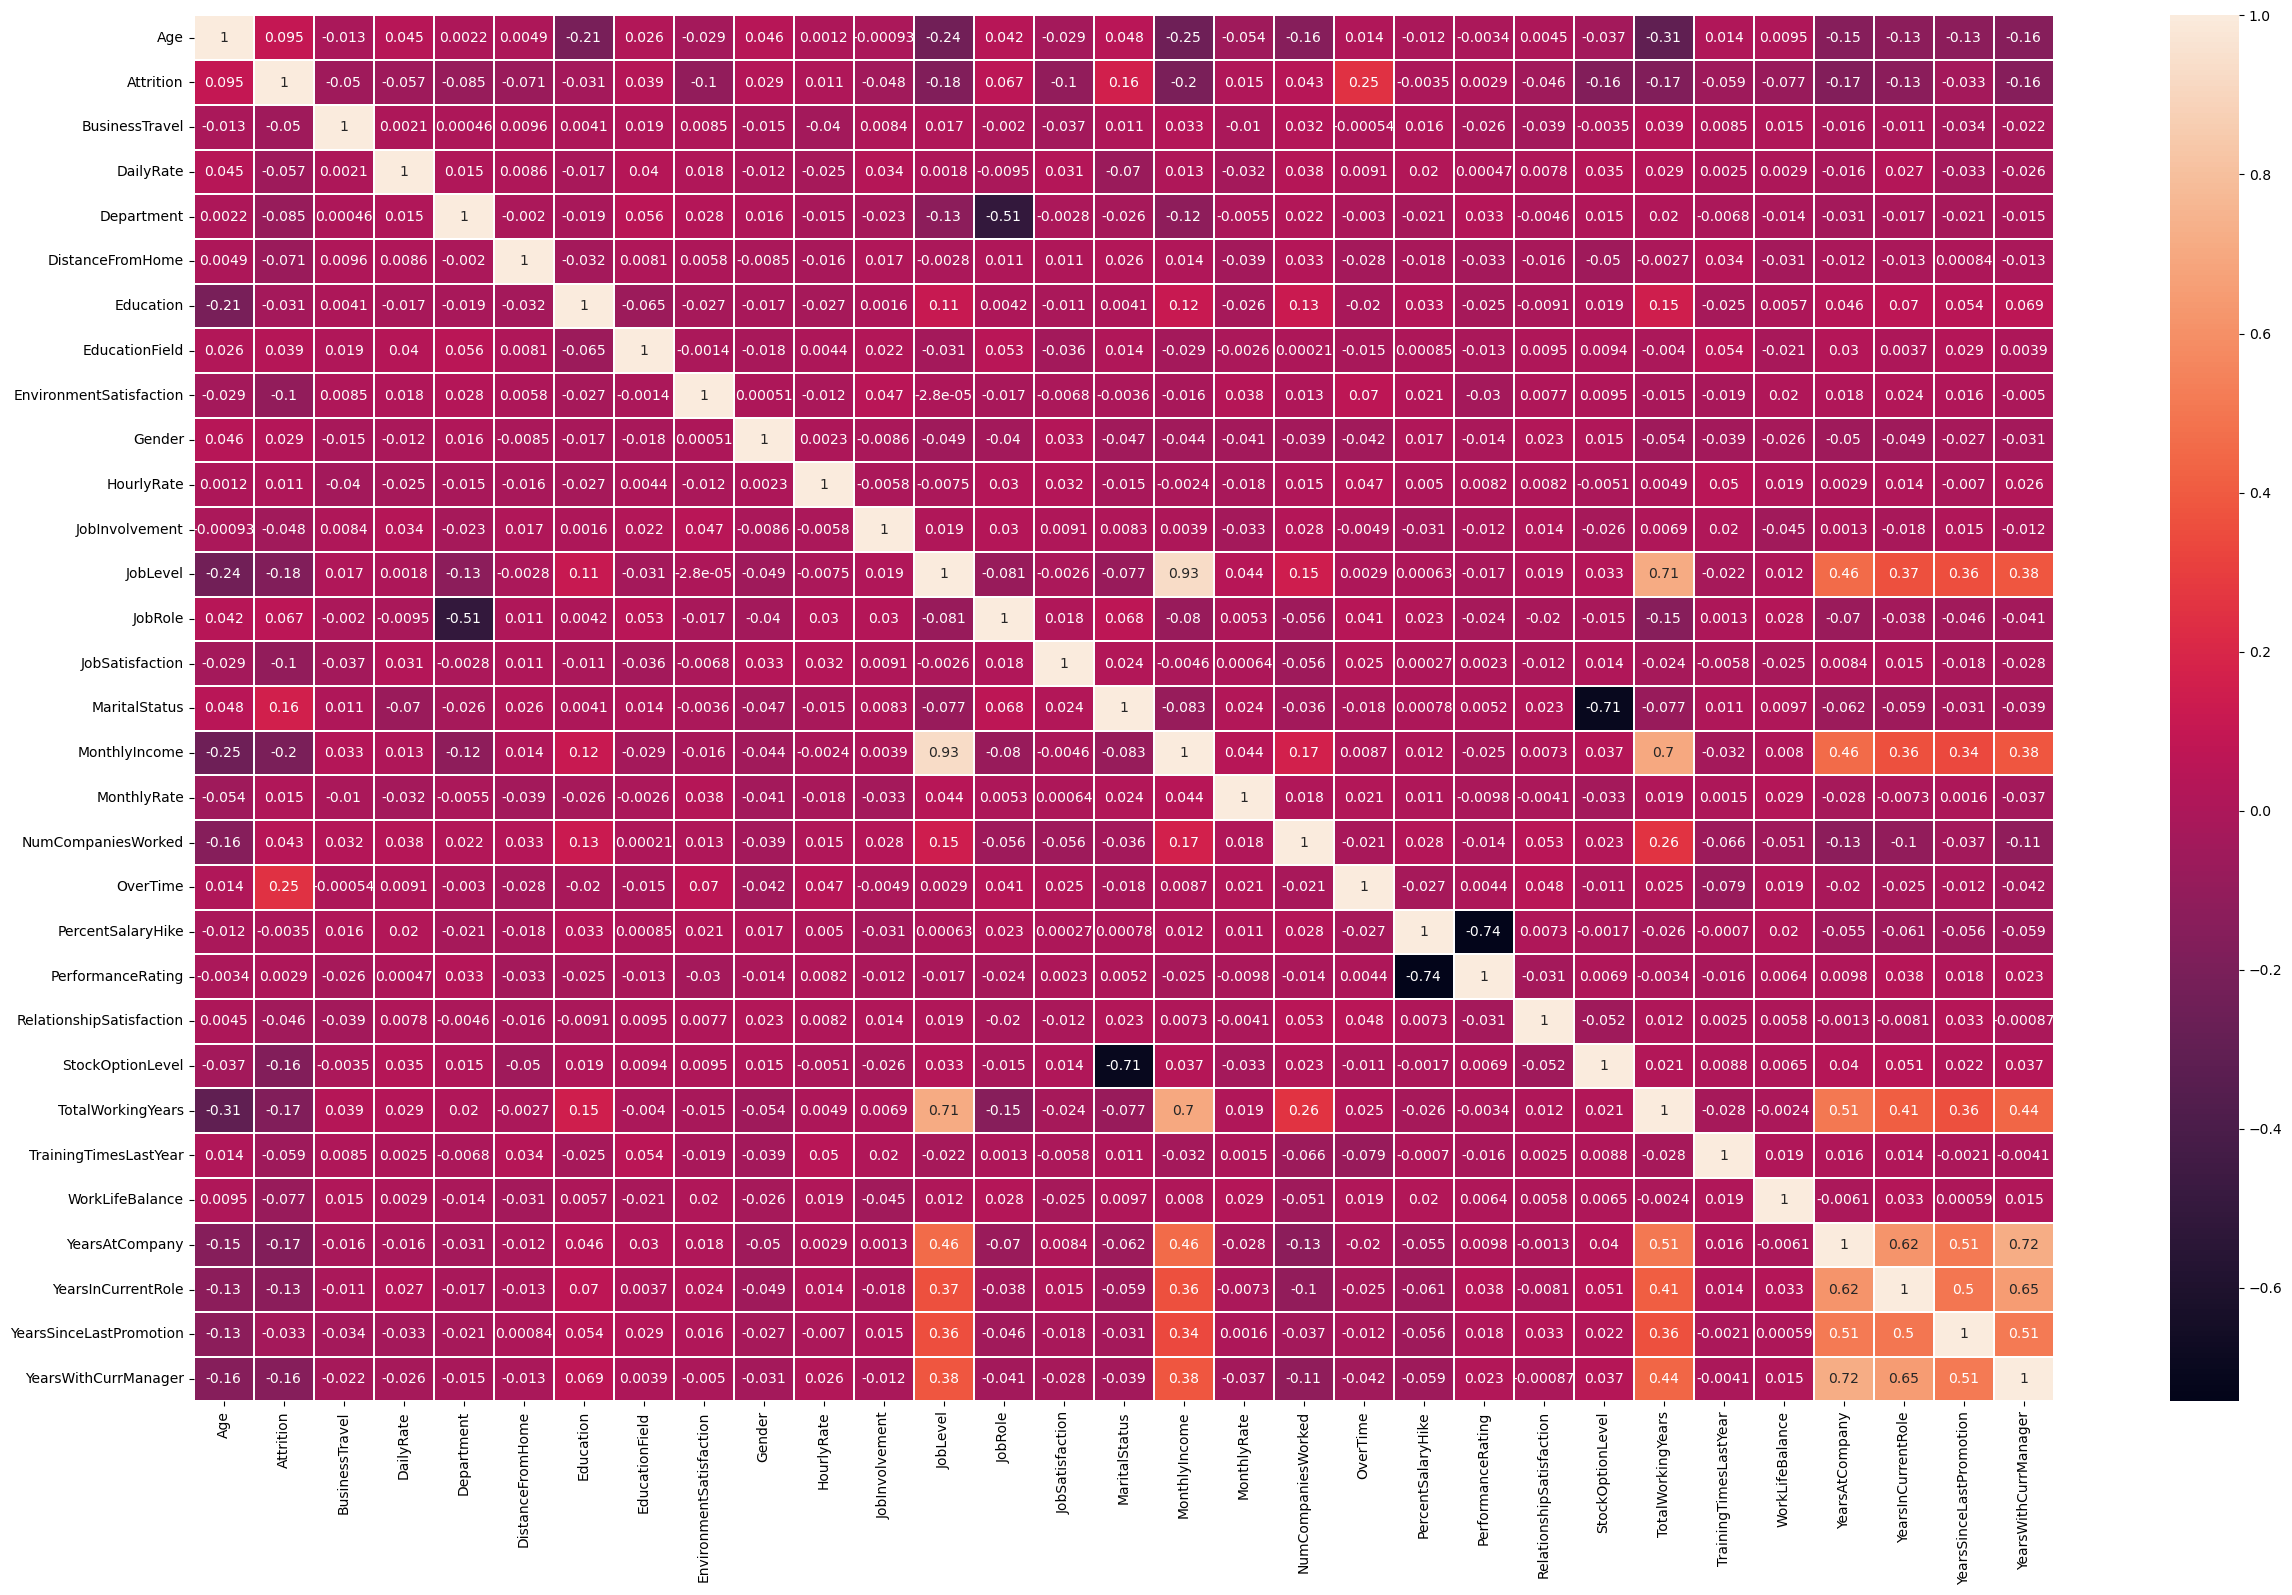

In [563]:
#The heatmap to see the coorelation
plt.figure(figsize=(30,18))
sns.heatmap(corr,annot=True,linewidths=0.1)

There is high relation between column so we can move to the model builing phase

In [564]:
from sklearn.preprocessing import StandardScaler

In [565]:
scaler=StandardScaler()

In [566]:
x=data.drop(columns='Attrition')

In [567]:
y=data['Attrition']

In [568]:
x_scaled=scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547649,0.639841,0.742527,-1.374051,1.015412,-0.891688,-0.756900,-0.660531,-1.224745,-1.345838,0.757158,-0.017062,1.032716,1.153254,1.236820,0.219553,0.726020,2.125136,1.591746,-0.208691,-0.426230,-1.584178,-1.015958,-0.156575,-2.171982,-1.928712,0.514374,-0.692357,-0.679146,0.245834
1,0.547649,-1.562889,-1.297775,0.727775,-0.263642,-1.868426,-0.756900,0.254625,0.816497,1.036319,-0.585451,-0.017062,0.626374,-0.660853,-0.133282,-0.014535,1.488876,-0.678049,-0.628241,-1.742573,2.346151,1.191438,0.364317,-0.156575,0.155707,0.733454,0.514374,0.932019,-0.368715,0.806541
2,-0.573582,0.639841,1.414363,0.727775,1.015412,-0.891688,-1.495707,1.169781,0.816497,-1.345838,-0.585451,-1.020283,-0.998992,0.246200,1.236820,-1.366400,-1.674841,1.324226,1.591746,1.325191,-0.426230,-0.658973,-1.015958,-0.156575,0.155707,0.733454,-1.118736,-0.692357,-0.679146,-1.155935
3,-0.573582,-1.562889,1.461466,0.727775,1.015412,1.061787,-0.756900,1.169781,-1.224745,1.036319,0.757158,-1.020283,0.626374,0.246200,-0.133282,-0.868608,1.243211,-0.678049,1.591746,-0.208691,-0.426230,0.266233,-1.015958,-0.156575,0.155707,0.733454,0.514374,0.932019,0.252146,-1.155935
4,1.668880,0.639841,-0.524295,0.727775,1.015412,-1.868426,0.720714,-1.575686,0.816497,-0.154759,0.757158,-1.020283,-0.998992,-0.660853,-0.133282,-0.603985,0.325900,2.525591,-0.628241,-0.208691,-0.426230,1.191438,0.364317,-0.156575,0.155707,0.733454,-1.118736,-0.692357,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.573582,-1.562889,0.202082,0.727775,-1.542695,-0.891688,0.720714,0.254625,0.816497,-0.154759,-1.928060,-0.017062,-0.998992,1.153254,-0.133282,-1.054561,-0.284329,0.523316,-0.628241,1.325191,-0.426230,0.266233,0.364317,1.042199,0.155707,0.733454,0.514374,-0.692357,-0.679146,-0.314873
1466,-0.573582,0.639841,-0.469754,0.727775,-0.263642,-1.868426,0.720714,1.169781,0.816497,-0.154759,-0.585451,0.986160,-1.811675,-1.567907,-0.133282,0.989010,1.004010,0.523316,-0.628241,1.325191,-0.426230,-1.584178,0.364317,-0.156575,1.707500,0.733454,0.514374,0.932019,-0.368715,0.806541
1467,1.668880,0.639841,-1.605183,0.727775,1.015412,0.085049,-0.756900,-0.660531,0.816497,-1.345838,-1.928060,-0.017062,-0.186309,-0.660853,-0.133282,0.256526,-1.284418,-0.678049,1.591746,-1.742573,2.346151,-0.658973,0.364317,-0.156575,-2.171982,0.733454,0.514374,-0.692357,-0.679146,-0.314873
1468,0.547649,-1.562889,0.546677,-1.374051,1.015412,0.085049,0.720714,1.169781,0.816497,1.036319,-0.585451,-0.017062,1.032716,-0.660853,-0.133282,0.059898,-0.150393,-0.277594,-0.628241,-0.208691,-0.426230,1.191438,-1.015958,1.042199,0.155707,-0.597629,0.514374,0.932019,-0.679146,1.086895


In [569]:
y

0       2
1       1
2       2
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: Attrition, Length: 1470, dtype: int32

In [570]:
corr['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
Age                         0.094911
JobRole                     0.067151
NumCompaniesWorked          0.043494
EducationField              0.038536
Gender                      0.029453
MonthlyRate                 0.015170
HourlyRate                  0.011471
PerformanceRating           0.002889
PercentSalaryHike          -0.003532
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
JobInvolvement             -0.048046
BusinessTravel             -0.049538
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
DistanceFromHome           -0.070630
WorkLifeBalance            -0.077338
Department                 -0.085293
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
YearsInCurrentRole         -0.130590
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.164550
Y

In [571]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [572]:
for i in range(30):
    print(x_scaled.columns[i])
    print('  ')
    print(variance_inflation_factor(x_scaled,i))
    print('  ')

Age
  
1.164265927295199
  
BusinessTravel
  
1.0136353647911236
  
DailyRate
  
1.0260781711025793
  
Department
  
1.4348967491185036
  
DistanceFromHome
  
1.019229434213471
  
Education
  
1.0770300726358133
  
EducationField
  
1.0306200939416348
  
EnvironmentSatisfaction
  
1.0211432592893053
  
Gender
  
1.0219344186598434
  
HourlyRate
  
1.0159551507338807
  
JobInvolvement
  
1.0173110905628941
  
JobLevel
  
7.958827987441524
  
JobRole
  
1.4231561685878835
  
JobSatisfaction
  
1.0215063467009642
  
MaritalStatus
  
2.0521262895490593
  
MonthlyIncome
  
7.62781154662305
  
MonthlyRate
  
1.020791284744169
  
NumCompaniesWorked
  
1.2496106989642615
  
OverTime
  
1.034922543353458
  
PercentSalaryHike
  
2.281692224823068
  
PerformanceRating
  
2.271180978331743
  
RelationshipSatisfaction
  
1.0171442625952403
  
StockOptionLevel
  
2.030826644176086
  
TotalWorkingYears
  
2.6913586550633535
  
TrainingTimesLastYear
  
1.0248472913558782
  
WorkLifeBalance
  
1.014878

NO high relation detected so we can move to the model building

In [573]:
#now let us import the libraries to make our model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [503]:
# we will use the linearregression to check the best random state
maxACC=0
maxrs=0
for i in range(1,300):
    lr=LogisticRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.9206349206349206 123


In [504]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=maxrs)

In [490]:
#now let us run the model on different algorithms and see which has best accuracy
rfc=RandomForestClassifier()
et=ExtraTreesClassifier()
lg=LogisticRegression()
sv=SVC()
dc=DecisionTreeClassifier()
gbdt=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
knn=KNeighborsClassifier()

In [496]:
models=[rfc,et,lg,sv,dc,gbdt,abc,bc]

In [498]:
accuracy={}
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_scaled)
    accuracy[i]=accuracy_score(y,pred)
accuracy

{RandomForestClassifier(): 0.9741496598639455,
 ExtraTreesClassifier(): 0.9727891156462585,
 LogisticRegression(): 0.8775510204081632,
 SVC(): 0.889795918367347,
 DecisionTreeClassifier(): 0.9428571428571428,
 GradientBoostingClassifier(): 0.935374149659864,
 AdaBoostClassifier(): 0.8884353741496599,
 BaggingClassifier(): 0.9585034013605442}

In [508]:
maximum=max(accuracy.values())

In [510]:
for i in accuracy:
    if accuracy[i]==maximum:
        print(i)

RandomForestClassifier()


The randomforest has the best accuracy let us see this after cross validation

In [511]:
cross_val_accu={}
for i in models:
    cross_val_accu[i]=cross_val_score(i,x_scaled,y,cv=5).mean()
cross_val_accu

{RandomForestClassifier(): 0.85578231292517,
 ExtraTreesClassifier(): 0.8598639455782312,
 LogisticRegression(): 0.8693877551020408,
 SVC(): 0.85578231292517,
 DecisionTreeClassifier(): 0.7952380952380953,
 GradientBoostingClassifier(): 0.8632653061224488,
 AdaBoostClassifier(): 0.8666666666666666,
 BaggingClassifier(): 0.8510204081632653}

We will do the grid search cv for the random forest, adaboost and the gradient boost

In [512]:
#Randomforest
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=2, n_jobs=-1)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_,grid_search.best_score_)

{'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100} 0.8421052631578947


In [513]:
model=RandomForestClassifier(bootstrap=False,max_depth=10,max_features='sqrt',min_samples_leaf=1,min_samples_split=5,
                            n_estimators=100)

In [514]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_split=5)

In [516]:
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.8967391304347826

In [517]:
#Extratree classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=et, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_,grid_search.best_score_)

{'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100} 0.8466433566433567


In [518]:
model=ExtraTreesClassifier(max_depth=30,max_features='sqrt',min_samples_leaf=1,min_samples_split=5,
                          n_estimators=100)

In [519]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.8913043478260869

In [521]:
#Extratree classifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}
grid_search = GridSearchCV(estimator=gbdt, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_,grid_search.best_score_)

{'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} 0.8620649938296998


In [522]:
model=GradientBoostingClassifier(learning_rate=0.1,max_depth=4,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,
                                n_estimators=200)

In [523]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.8967391304347826

In [525]:
#adaboost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}
grid_search = GridSearchCV(estimator=abc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_,grid_search.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 50} 0.8539078568490334


In [527]:
model=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1.0,n_estimators=50)

In [529]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.8994565217391305

In [537]:
from sklearn.metrics import confusion_matrix, classification_report

In [536]:
confusion_matrix(y_test,pred) #for the adaboost classifier with 0.899 accuracy

array([[320,   0],
       [ 38,  10]], dtype=int64)

In [539]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.89      1.00      0.94       320
           2       1.00      0.21      0.34        48

    accuracy                           0.90       368
   macro avg       0.95      0.60      0.64       368
weighted avg       0.91      0.90      0.87       368



In [568]:
#logistic regression
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_,grid_search.best_score_)

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'} 0.8512011517893872


In [569]:
model=LogisticRegression(penalty='l2',solver='liblinear')

In [570]:
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [571]:
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.9211956521739131

So the logistic regression is the best classifer with 0.92 accuracy score
let us see the confusion matrix and classification report for this

In [573]:
confusion_matrix(y_test,pred)

array([[313,   7],
       [ 22,  26]], dtype=int64)

In [574]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.93      0.98      0.96       320
           2       0.79      0.54      0.64        48

    accuracy                           0.92       368
   macro avg       0.86      0.76      0.80       368
weighted avg       0.92      0.92      0.91       368



In [575]:
accuracy_score(y_test,pred)

0.9211956521739131

Final colclusion:
1.Before cross validation random forest, gradient boost and the extra tree classifier were the best model with the best 
accuracy

2. After the cross validation multiple model like random forest, extra tree, bagging, logistic regression were having high
accuracy

3.After the tuning the extra tree, random forest and the gradient boost were having accuracy aroung 0.89
and the logistic regression had the best accuracy with 0.92 score

4.The logistic regression was the best model with 0.92 accuracy score

Let us save the model

In [579]:
filename = "model_E03.pkl"
joblib.dump(model, filename)

['model_E03.pkl']

In [574]:
y.value_counts()

Attrition
1    1233
2     237
Name: count, dtype: int64

There is a class imbalance between these two classes and we have ignored that in the previous phase
now we will build another model in which we will balance the model and than make it

In [608]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [609]:
x1,y1=sm.fit_resample(x,y)

In [610]:
y1.value_counts()

Attrition
2    1233
1    1233
Name: count, dtype: int64

Now we have reshampled the data in the ratio of 1.0 and we have used smote which uses over sampling techniques because
we must had to use over sampling here only because other wise we with  under sampling we would have lost many quality
data important for our machine learning model

In [611]:
x1_scaled=scaler.fit_transform(x1)
x1_scaled=pd.DataFrame(x1_scaled,columns=x1.columns)
x1_scaled

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.656677,0.832875,0.803826,-1.001623,1.251563,-0.733369,-0.735309,-0.458983,-1.035504,-1.247786,0.959678,0.303720,1.095276,1.413406,1.286778,0.444951,0.713362,2.256050,1.632235,-0.008401,-0.336628,-1.438380,-0.778132,0.176343,-2.097486,-1.632481,0.877285,-0.641817,-0.654676,0.473916
1,0.656677,-1.200660,-1.316424,0.998379,-0.050147,-1.744262,-0.735309,0.476432,0.965713,1.203062,-0.365387,0.303720,0.662916,-0.466054,-0.132996,0.196096,1.476262,-0.690453,-0.612657,-1.602086,2.970640,1.391710,0.702480,0.176343,0.339260,0.929210,0.877285,1.193551,-0.319175,1.085149
2,-0.513385,0.832875,1.501989,0.998379,1.251563,-0.733369,-1.512871,1.411846,0.965713,-1.247786,-0.365387,-0.789672,-1.066522,0.473676,1.286778,-1.241052,-1.687636,1.414192,1.632235,1.585283,-0.336628,-0.495017,-0.778132,0.176343,0.339260,0.929210,-0.822153,-0.641817,-0.654676,-1.054166
3,-0.513385,-1.200660,1.550937,0.998379,1.251563,1.288417,-0.735309,1.411846,-1.035504,1.203062,0.959678,-0.789672,0.662916,0.473676,-0.132996,-0.711857,1.230583,-0.690453,1.632235,-0.008401,-0.336628,0.448346,-0.778132,0.176343,0.339260,0.929210,0.877285,1.193551,0.351827,-1.054166
4,1.826740,0.832875,-0.512635,0.998379,1.251563,-1.744262,0.819813,-1.394397,0.965713,-0.022362,0.959678,-0.789672,-1.066522,-0.466054,-0.132996,-0.430541,0.313219,2.676979,-0.612657,-0.008401,-0.336628,1.391710,0.702480,0.176343,0.339260,0.929210,-0.822153,-0.641817,0.016326,-0.442933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,-1.683448,0.832875,-1.406592,0.998379,-1.351857,-0.733369,1.597375,1.411846,-1.035504,-0.022362,0.959678,-0.789672,-1.498881,0.473676,-0.132996,-0.110172,-1.520523,0.993263,-0.612657,-0.008401,-0.336628,1.391710,0.702480,0.176343,0.339260,-1.632481,0.877285,1.296998,3.035833,1.085149
2462,-0.513385,-1.200660,-0.211215,-1.001623,1.251563,-0.733369,-0.735309,-0.458983,0.965713,-0.022362,-0.365387,-0.789672,0.662916,-1.405784,-0.132996,1.070713,-1.275968,-0.690453,-0.612657,-0.008401,-0.336628,0.448346,-0.778132,0.176343,0.339260,-0.351635,-0.822153,1.066902,1.022829,0.779533
2463,-0.513385,0.832875,1.007350,-1.001623,-0.050147,-0.733369,0.042252,0.476432,-1.035504,-0.022362,-0.365387,-0.789672,0.662916,-0.466054,-0.132996,-0.003774,0.466137,0.151405,-0.612657,-0.008401,-0.336628,-1.438380,-0.778132,-1.059060,0.339260,-0.351635,-0.822153,-0.641817,-0.654676,-1.054166
2464,0.656677,-1.200660,-0.172571,-1.001623,1.251563,-1.744262,1.597375,-1.394397,-1.035504,-1.247786,-0.365387,-0.789672,1.095276,-0.466054,1.286778,-1.061626,-0.730497,-1.111382,1.632235,-0.008401,-0.336628,0.448346,-0.778132,-1.059060,-0.472988,-0.351635,-0.822153,-0.641817,-0.319175,-0.442933


Let us now see the variance in the dataset

In [612]:
for i in range(30):
    print(x1_scaled.columns[i])
    print('    ')
    print(variance_inflation_factor(x1_scaled,i))

Age
    
1.1803398786188068
BusinessTravel
    
1.082658944853581
DailyRate
    
1.0518972674130278
Department
    
1.4419732434551975
DistanceFromHome
    
1.0676347979944492
Education
    
1.1097881690897142
EducationField
    
1.0477682905659254
EnvironmentSatisfaction
    
1.0954352436063768
Gender
    
1.0601160296922831
HourlyRate
    
1.042179123407254
JobInvolvement
    
1.0749518422054223
JobLevel
    
6.107893939805997
JobRole
    
1.3243760482982594
JobSatisfaction
    
1.0837292433144095
MaritalStatus
    
1.6771874540313905
MonthlyIncome
    
5.500492602702743
MonthlyRate
    
1.0520862488163714
NumCompaniesWorked
    
1.238682311634014
OverTime
    
1.0593889299502528
PercentSalaryHike
    
1.6429163907614786
PerformanceRating
    
1.596245122478219
RelationshipSatisfaction
    
1.0620344573241396
StockOptionLevel
    
1.815677887441416
TotalWorkingYears
    
2.961008169732412
TrainingTimesLastYear
    
1.0632378844337236
WorkLifeBalance
    
1.093069051206001
YearsAtComp

The job level and monthly income are having high variance let us see the vif after deleting one of them

In [613]:
x1_scaled=x1_scaled.drop(columns='JobLevel')

In [614]:
for i in range(29):
    print(x1_scaled.columns[i])
    print('    ')
    print(variance_inflation_factor(x1_scaled,i))

Age
    
1.168930782577313
BusinessTravel
    
1.0826433348179247
DailyRate
    
1.0509709029109358
Department
    
1.4417497786713158
DistanceFromHome
    
1.0675066160412638
Education
    
1.1097674256138685
EducationField
    
1.047024130239269
EnvironmentSatisfaction
    
1.0883982457868857
Gender
    
1.0599680387977122
HourlyRate
    
1.0420951137469296
JobInvolvement
    
1.0715652535874685
JobRole
    
1.3234577309701683
JobSatisfaction
    
1.0804612930991753
MaritalStatus
    
1.6747776324865555
MonthlyIncome
    
2.1291627219845686
MonthlyRate
    
1.0516546333967556
NumCompaniesWorked
    
1.2244811437600838
OverTime
    
1.0542144011461247
PercentSalaryHike
    
1.6408195476065937
PerformanceRating
    
1.5927927626462794
RelationshipSatisfaction
    
1.0565306524436553
StockOptionLevel
    
1.8099400122661007
TotalWorkingYears
    
2.6922085845129446
TrainingTimesLastYear
    
1.0624315450310688
WorkLifeBalance
    
1.0898975498770018
YearsAtCompany
    
2.683546103404106

Now the monthly income which was having high variance is also having a low variance
So deleting the job level was a good idea
Now let us proceed to the model building phase

In [615]:
#now let us import the libraries to make our model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [616]:
# we will use the linearregression to check the best random state
maxACC=0
maxrs=0
for i in range(1,400):
    lr=LogisticRegression()
    x_train,x_test,y_train,y_test=train_test_split(x1_scaled,y1,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.8978930307941653 335


In [617]:
x_train,x_test,y_train,y_test=train_test_split(x1_scaled,y1,test_size=0.25,random_state=maxrs)

In [618]:
#now let us run the model on different algorithms and see which has best accuracy
rfc=RandomForestClassifier()
et=ExtraTreesClassifier()
lg=LogisticRegression()
sv=SVC()
dc=DecisionTreeClassifier()
gbdt=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
knn=KNeighborsClassifier()

In [619]:
models=[rfc,et,lg,sv,dc,gbdt,abc,bc]

In [621]:
accuracy_reshampled={}
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x1_scaled)
    accuracy_reshampled[i]=accuracy_score(y1,pred)
accuracy_reshampled

{RandomForestClassifier(): 0.9781021897810219,
 ExtraTreesClassifier(): 0.980940794809408,
 LogisticRegression(): 0.8803730738037308,
 SVC(): 0.9509326845093269,
 DecisionTreeClassifier(): 0.9444444444444444,
 GradientBoostingClassifier(): 0.9412003244120033,
 AdaBoostClassifier(): 0.8852392538523925,
 BaggingClassifier(): 0.962287104622871}

In [623]:
accuracy_reshampled={}
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    accuracy_reshampled[i]=accuracy_score(y_test,pred)
accuracy_reshampled

{RandomForestClassifier(): 0.9173419773095624,
 ExtraTreesClassifier(): 0.9238249594813615,
 LogisticRegression(): 0.8978930307941653,
 SVC(): 0.9189627228525121,
 DecisionTreeClassifier(): 0.7844408427876823,
 GradientBoostingClassifier(): 0.9157212317666127,
 AdaBoostClassifier(): 0.8946515397082658,
 BaggingClassifier(): 0.8752025931928687}

As of now the extra tree classifier is performing good now we will see what happens after the cross validation

In [624]:
cross_val_accu_reshampled={}
for i in models:
    cross_val_accu_reshampled[i]=cross_val_score(i,x1_scaled,y1,cv=5).mean()
cross_val_accu_reshampled

{RandomForestClassifier(): 0.8979075477741005,
 ExtraTreesClassifier(): 0.9035788488227903,
 LogisticRegression(): 0.8508610424485304,
 SVC(): 0.8853470859235779,
 DecisionTreeClassifier(): 0.8285363510195367,
 GradientBoostingClassifier(): 0.8699444038399948,
 AdaBoostClassifier(): 0.8452053444580401,
 BaggingClassifier(): 0.8820909740414384}

The best models as of now are the randomforest and the extratreeclassifier 
We will see what happens after the tuning process

In [625]:
#Random forest classifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=2, n_jobs=-1)
grid_search.fit(x1_scaled,y1)
print(grid_search.best_params_,grid_search.best_score_)

{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300} 0.8986212489862124


In [626]:
model=RandomForestClassifier(bootstrap=False,max_depth=30,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,
                            n_estimators=300,verbose=True)

In [628]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_randomforest=accuracy_score(y_test,pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


In [629]:
print(accuracy_randomforest)

0.9254457050243112


In [633]:
#Extratree classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=et, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x1_scaled,y1)
print(grid_search.best_params_,grid_search.best_score_)

{'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} 0.9068267485690352


In [658]:
model=ExtraTreesClassifier(bootstrap=False,max_depth=20,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,
                          n_estimators=200,n_jobs=-1,verbose=True)

In [659]:
model.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.2s finished


ExtraTreesClassifier(max_depth=20, n_estimators=200, n_jobs=-1, verbose=True)

In [660]:
pred=model.predict(x_test)
accuracy_extratree=accuracy_score(y_test,pred)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [661]:
print(accuracy_extratree)

0.9254457050243112


Conclusions for the reshampled dataset-
1. At first without the cross validation and the tuning the random forest and the extra tree had the best accuracy of around 92
2. After the cross validation the extra tree and the random forest had the best accuracy
3. After the tuning process the extra tree and the random forest had the accuracy of 92.5

Let us see the predictions

In [675]:
confusion_matrix(y_test,pred)

array([[302,   9],
       [ 37, 269]], dtype=int64)

In [676]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.89      0.97      0.93       311
           2       0.97      0.88      0.92       306

    accuracy                           0.93       617
   macro avg       0.93      0.93      0.93       617
weighted avg       0.93      0.93      0.93       617



In [686]:
import joblib

Saving the model

In [687]:
filename='model_E03.pkl'
joblib.dump(model,filename)

['model_E03.pkl']

In [688]:
a=joblib.load('model_E03.pkl')

Thanks Sir